# Init

In [5]:
%load_ext autoreload
%autoreload 2

import os
%env CUDA_VISIBLE_DEVICES=1
print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

import torch

# Explicitly set GPU 1
device = torch.device("cuda:0")  # Since CUDA_VISIBLE_DEVICES makes GPU 1 appear as GPU 0
torch.cuda.set_device(device)

# Check which device is being used
print("Current CUDA device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=1
CUDA_VISIBLE_DEVICES: 1
Current CUDA device: 0
Device name: NVIDIA RTX A6000


In [161]:
import sys
from pathlib import Path

# Get the parent directory of the notebook (i.e., the 'project/' folder)
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

from embedding_quality import embedding_quality
from plot_embedding import plot_embed, get_scale, add_scale, plot_embed_score
from analyze_rs import analyze_rs, analyze_rs_om

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
import torchvision
import pandas as pd


In [7]:
# Tasic
tasic_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-colors.npy')
tasic_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-pca50.npy')
tasic_ttypes = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-ttypes.npy')

tasic_pca2 = tasic_pca50[:, :2]
tasic_pca2_scaled = tasic_pca2 / tasic_pca2[:,0].std()
tasic_pca2_scaled_eval = embedding_quality(tasic_pca2_scaled, tasic_pca50, tasic_ttypes)

In [8]:
# kanton
# data
folder_path = "/gpfs01/berens/data/sharing_files/sdamrich/for_noel/human-409b2"
data_file = f"{folder_path}/human-409b2.data.npy"
labels_file = f"{folder_path}/human-409b2.labels.npy"
pkl_file = f"{folder_path}/human-409b2.pkl"

kanton_pca50 = np.load(data_file)
kanton_labels = np.load(labels_file)

with open(pkl_file, "rb") as f:
    pkl_data = pickle.load(f)

kanton_colors = np.array([pkl_data["label_colors"][i] for i in kanton_labels])

# Print shapes and types
print("Data shape:", kanton_pca50.shape)
print("Labels shape:", kanton_labels.shape)
print("Colors shape:", kanton_colors.shape)
print("Pickle data type:", type(pkl_data))

kanton_pca2 = kanton_pca50[:, :2]
kanton_pca2_scaled = kanton_pca2 / kanton_pca2[:,0].std()
kanton_eval_pca2_scaled = embedding_quality(kanton_pca50, kanton_pca2_scaled, kanton_labels)

Data shape: (20272, 50)
Labels shape: (20272,)
Colors shape: (20272,)
Pickle data type: <class 'dict'>


In [9]:
# genome
# data
genome_data = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/gt_sum_thinned.npy')
genome_pca50 = PCA(n_components=50).fit_transform(genome_data)

population_labels = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/population_labels.txt', dtype=str)
population_names = pd.read_csv('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/1kgp_population_names.tsv', sep='\t', dtype=str)

# colors
genome_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/genome_colors.npy')

genome_pca2 = genome_pca50[:, :2]
genome_pca2_scaled = genome_pca2 / genome_pca2[:,0].std()
genome_eval_pca2_scaled = embedding_quality(genome_pca50, genome_pca2_scaled, population_labels)


In [10]:
# mnist
# load MNIST
mnist_train = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                         train=True,
                                         download=False, 
                                         transform=None)
x_train, y_train = mnist_train.data.float().numpy(), mnist_train.targets

mnist_test = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                        train=False,
                                        download=False, 
                                        transform=None)
x_test, y_test = mnist_test.data.float().numpy(), mnist_test.targets

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

pca = PCA(n_components=50)
mnist_pca50 = pca.fit_transform(x_train)
mnist_labels = y_train

mnist_pca2 = mnist_pca50[:, :2]
mnist_pca2_scaled = mnist_pca2 / mnist_pca2[:,0].std()
mnist_eval_pca2_scaled = embedding_quality(mnist_pca50, mnist_pca2_scaled, mnist_labels)

In [11]:
# retina
retina_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/3000_no_std_pca50.npy')
retina_colors_list = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/clusterColors.npy')
retina_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/labels 1.npy')
retina_colors = retina_colors_list[retina_labels]

retina_pca2 = retina_pca50[:, :2]
retina_pca2_scaled = retina_pca2 / retina_pca2[:,0].std()
retina_eval_pca2_scaled = embedding_quality(retina_pca50, retina_pca2_scaled, retina_labels)

In [12]:
# zebrafish
zfish_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.data.npy')
zfish_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.labels.npy')
zfish_alt_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.altlabels.npy')

zfish_pca2 = zfish_pca50[:, :2]
zfish_pca2_scaled = zfish_pca2 / zfish_pca2[:,0].std()
zfish_eval_pca2_scaled = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_colors)
zfish_eval_pca2_scaled_alt = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_alt_colors)

In [13]:
# c-elegans
c_el_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_elegans_50pc.npy')
c_el_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_cell_types.npy', allow_pickle=True).astype(str)
c_el_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_colors.npy')

c_el_pca2 = c_el_pca50[:, :2]
c_el_pca2_scaled = c_el_pca2 / c_el_pca2[:,0].std()
c_el_pca2_scaled_eval = embedding_quality(c_el_pca50, c_el_pca2_scaled, c_el_labels)

In [14]:
# PCA-reg results
with open('results/paper/dreams/dreams_pca/tasic_results_dreams_pca.pkl', 'rb') as f:
    tasic_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/kanton_results_dreams_pca.pkl', 'rb') as f:
    kanton_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/genome_results_dreams_pca.pkl', 'rb') as f:
    genome_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/MNIST_results_dreams_pca.pkl', 'rb') as f:
    mnist_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/retina_results_dreams_pca.pkl', 'rb') as f:
    retina_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/zfish_results_dreams_pca.pkl', 'rb') as f:
    zfish_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_pca/c_elegans_results_dreams_pca.pkl', 'rb') as f:
    c_el_reg_results = pickle.load(f)

In [15]:
# MDS reg results
with open('results/paper/dreams/dreams_mds/tasic_results_dreams_mds.pkl', 'rb') as f:
    tasic_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/kanton_results_dreams_mds.pkl', 'rb') as f:
    kanton_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/genome_results_dreams_mds.pkl', 'rb') as f:
    genome_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/MNIST_results_dreams_mds.pkl', 'rb') as f:
    mnist_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/retina_results_dreams_mds.pkl', 'rb') as f:
    retina_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/zfish_results_dreams_mds.pkl', 'rb') as f:
    zfish_mds_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_mds/c_elegans_results_dreams_mds.pkl', 'rb') as f:
    c_el_mds_reg_results = pickle.load(f)

In [16]:
# Other methods results
with open('results/paper/other_methods/tasic_results_om.pkl', 'rb') as f:
    tasic_om_results = pickle.load(f)

with open('results/paper/other_methods/kanton_results_om.pkl', 'rb') as f:
    kanton_om_results = pickle.load(f)

with open('results/paper/other_methods/genome_results_om.pkl', 'rb') as f:
    genome_om_results = pickle.load(f)

with open('results/paper/other_methods/MNIST_results_om.pkl', 'rb') as f:
    mnist_om_results = pickle.load(f)

with open('results/paper/other_methods/retina_results_om.pkl', 'rb') as f:
    retina_om_results = pickle.load(f)

with open('results/paper/other_methods/zfish_results_om.pkl', 'rb') as f:
    zfish_om_results = pickle.load(f)

with open('results/paper/other_methods/c_elegans_results_om.pkl', 'rb') as f:
    c_el_om_results = pickle.load(f)

In [17]:
tasic_mds = tasic_om_results['squad_mds']['seed_0']['embedding']
tasic_mds_eval = tasic_om_results['squad_mds']['seed_0']['eval']

kanton_mds = kanton_om_results['squad_mds']['seed_0']['embedding']
kanton_mds_eval = kanton_om_results['squad_mds']['seed_0']['eval']

genome_mds = genome_om_results['squad_mds']['seed_0']['embedding']
genome_mds_eval = genome_om_results['squad_mds']['seed_0']['eval']

mnist_mds = mnist_om_results['squad_mds']['seed_0']['embedding']
mnist_mds_eval = mnist_om_results['squad_mds']['seed_0']['eval']

retina_mds = retina_om_results['squad_mds']['seed_0']['embedding']
retina_mds_eval = retina_om_results['squad_mds']['seed_0']['eval']

zfish_mds = zfish_om_results['squad_mds']['seed_0']['embedding']
zfish_mds_eval = zfish_om_results['squad_mds']['seed_0']['eval']

c_el_mds = c_el_om_results['squad_mds']['seed_0']['embedding']
c_el_mds_eval = c_el_om_results['squad_mds']['seed_0']['eval']

In [18]:
# curves
with open('results/paper/other_methods/tasic_starmap_curve.pkl', 'rb') as f:
    tasic_starmap_curve_results = pickle.load(f)

with open('results/paper/other_methods/tasic_mds_hybrid_curve.pkl', 'rb') as f:
    tasic_mds_hybrid_curve_results = pickle.load(f)

with open('results/paper/other_methods/c_elegans_mds_hybrid_curve.pkl', 'rb') as f:
    c_elegans_mds_hybrid_curve_results = pickle.load(f)

with open('results/paper/other_methods/tasic_results_opentsne_exaggeration.pkl', 'rb') as f:
    tasic_openTSNE_exag_results = pickle.load(f)


In [140]:
# CNE results
with open('results/paper/dreams/dreams_cne/tasic_results_dreams_cne.pkl', 'rb') as f:
    tasic_cne_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_cne/tasic_results_dreams_cne2.pkl', 'rb') as f:
    tasic_cne_dec_results = pickle.load(f)

# with open('results/paper/dreams/dreams_cne/tasic_results_dreams_cne2.pkl', 'rb') as f:
#     tasic_cne_reg_results = pickle.load(f)

# with open('results/paper/dreams/dreams_cne/tasic_results_dreams_cne_dec2.pkl', 'rb') as f:
#     tasic_cne_dec_results = pickle.load(f)

with open('results/paper/dreams/dreams_cne/kanton_results_dreams_cne.pkl', 'rb') as f:
     kanton_cne_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_cne/kanton_results_dreams_cne_dec.pkl', 'rb') as f:
     kanton_cne_dec_results = pickle.load(f)

with open('results/paper/dreams/dreams_cne/genome_results_dreams_cne.pkl', 'rb') as f:
     genome_cne_reg_results = pickle.load(f)

with open('results/paper/dreams/dreams_cne/genome_results_dreams_cne_dec.pkl', 'rb') as f:
     genome_cne_dec_results = pickle.load(f)


In [20]:
# CNE results
with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_dreams_cne.pkl', 'rb') as f:
    c_el_cne_reg_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_dreams_cne_decoder.pkl', 'rb') as f:
    c_el_cne_dec_results = pickle.load(f)


In [21]:
datasets_pca = {
    "Tasic et al.": dict(
        pca_emb=tasic_pca2_scaled,
        labels=tasic_ttypes,
        data=tasic_pca50,
    ),
    "Kanton et al.": dict(
        pca_emb=kanton_pca2_scaled,
        labels=kanton_labels,
        data=kanton_pca50,
    ),
    "1000 Genomes": dict(
        pca_emb=genome_pca2_scaled,
        labels=genome_colors,
        data=genome_pca50,
    ),
    "MNIST": dict(
        pca_emb=mnist_pca2_scaled,
        labels=mnist_labels,
        data=mnist_pca50,
    ),
    "Wagner et al.": dict(
        pca_emb=zfish_pca2_scaled,
        labels=zfish_colors,
        data=zfish_pca50,
    ),
    "Packer et al.": dict(
        pca_emb=c_el_pca2_scaled,
        labels=c_el_labels,
        data=c_el_pca50,
    ),
    "Macosko et al.": dict(
        pca_emb=retina_pca2_scaled,
        labels=retina_labels,
        data=retina_pca50,
    ),
}

for dataset in datasets_pca:
    pca_emb = datasets_pca[dataset]['pca_emb']
    labels = datasets_pca[dataset]['labels']
    data = datasets_pca[dataset]['data']
    knn = []
    cpd = []
    for i in range(4):
        eval = embedding_quality(pca_emb, data, labels, seed=i)
        knn.append(eval[0])
        cpd.append(eval[2])
    knn = np.array(knn)
    cpd = np.array(cpd)
    knn_mean = np.mean(knn)
    knn_std = np.std(knn)
    cpd_mean = np.mean(cpd)
    cpd_std = np.std(cpd)
    evals = {
        'knn_mean': knn_mean,
        'knn_std': knn_std,
        'cpd_mean': cpd_mean,
        'cpd_std': cpd_std,
    }
    datasets_pca[dataset]['eval'] = evals


In [22]:
lambdas = []
for lam in tasic_reg_results['seed_0'].keys():
    if lam.startswith('lambda_'):
        lam_value = round(float(lam.split('_')[1]),3)
        lambdas.append(lam_value)

lambdas = sorted(np.array(lambdas))
print(lambdas)

idx_01 = lambdas.index(0.1)

[np.float64(0.0), np.float64(0.025), np.float64(0.05), np.float64(0.075), np.float64(0.1), np.float64(0.125), np.float64(0.15), np.float64(0.175), np.float64(0.2), np.float64(0.225), np.float64(0.25), np.float64(0.275), np.float64(0.3), np.float64(0.325), np.float64(0.35), np.float64(0.375), np.float64(0.4), np.float64(0.425), np.float64(0.45), np.float64(0.475), np.float64(0.5), np.float64(0.525), np.float64(0.55), np.float64(0.575), np.float64(0.6), np.float64(0.625), np.float64(0.65), np.float64(0.675), np.float64(0.7), np.float64(0.725), np.float64(0.75), np.float64(0.775), np.float64(0.8), np.float64(0.825), np.float64(0.85), np.float64(0.875), np.float64(0.9), np.float64(0.925), np.float64(0.95), np.float64(0.975), np.float64(1.0)]


# Analyze

In [79]:
score_type = 'relative_score'

## Tasic

In [80]:
# tasic
(
    tasic_reg_df_knn_scores,
    tasic_reg_df_cpd_scores,
    tasic_reg_knn_means,
    tasic_reg_knn_stds,
    tasic_reg_cpd_means,
    tasic_reg_cpd_stds,
    tasic_reg_scores,
    tasic_reg_mean_scores,
    tasic_reg_max_mean_scores_idx,
    tasic_reg_max_mean_scores_lambda,
    tasic_reg_max_seed,
    tasic_reg_max_lambda,
    tasic_reg_max_score,
    tasic_reg_best_embedding,
    tasic_reg_best_embedding_eval,
) = analyze_rs(tasic_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_reg_max_lambda)
print('Score:', tasic_reg_max_score)
print('KNN:', tasic_reg_best_embedding_eval[0])
print('CPD:', tasic_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.455340,0.450793,0.434560,0.417702,0.399639,0.384804,0.372223,0.358190,0.348086,0.339606,...,0.055243,0.048367,0.042910,0.038028,0.033755,0.030396,0.027311,0.024284,0.021908,0.020468
seed_1,0.455037,0.450277,0.435144,0.418218,0.397956,0.384170,0.372135,0.359827,0.348993,0.340819,...,0.054601,0.048077,0.042406,0.037940,0.034435,0.030581,0.027319,0.024398,0.021753,0.020468
seed_2,0.454924,0.450609,0.435761,0.417832,0.399723,0.384812,0.372626,0.359600,0.348615,0.340181,...,0.054924,0.048699,0.042331,0.038057,0.033692,0.030426,0.027164,0.024482,0.021858,0.020468
seed_3,0.455256,0.449941,0.435316,0.418395,0.399312,0.384250,0.372093,0.359903,0.348325,0.338536,...,0.054970,0.048329,0.042666,0.037814,0.034132,0.030627,0.027286,0.023999,0.021766,0.020468


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.599969,0.704618,0.844005,0.878060,0.887805,0.891695,0.895887,0.898819,0.897409,0.898039,...,0.911797,0.912224,0.912616,0.912680,0.912985,0.913125,0.913088,0.913197,0.912893,0.913792
seed_1,0.576482,0.691772,0.831966,0.871327,0.883907,0.889975,0.892311,0.894502,0.895040,0.895379,...,0.905922,0.906129,0.906417,0.906433,0.906686,0.906713,0.906667,0.907087,0.906977,0.907488
seed_2,0.560716,0.691162,0.839822,0.878729,0.891493,0.898121,0.901655,0.901572,0.903794,0.904449,...,0.913359,0.913249,0.913625,0.913672,0.913629,0.913908,0.913984,0.914268,0.914008,0.914362
seed_3,0.597469,0.703458,0.838791,0.874574,0.885641,0.892298,0.896222,0.899083,0.901257,0.901241,...,0.909507,0.909661,0.909889,0.910156,0.910098,0.910441,0.910360,0.910429,0.909916,0.910444


Best performing lambda: lambda_0.07500000000000001
Score: 0.907076101098285
KNN: 0.41783225589790945
CPD: 0.8787286560359112


In [81]:
# tasic
(
    tasic_mds_reg_df_knn_scores,
    tasic_mds_reg_df_cpd_scores,
    tasic_mds_reg_knn_means,
    tasic_mds_reg_knn_stds,
    tasic_mds_reg_cpd_means,
    tasic_mds_reg_cpd_stds,
    tasic_mds_reg_scores,
    tasic_mds_reg_mean_scores,
    tasic_mds_reg_max_mean_scores_idx,
    tasic_mds_reg_max_mean_scores_lambda,
    tasic_mds_reg_max_seed,
    tasic_mds_reg_max_lambda,
    tasic_mds_reg_max_score,
    tasic_mds_reg_best_embedding,
    tasic_mds_reg_best_embedding_eval,
) = analyze_rs(tasic_mds_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_mds_reg_max_lambda)
print('Score:', tasic_mds_reg_max_score)
print('KNN:', tasic_mds_reg_best_embedding_eval[0])
print('CPD:', tasic_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.456183,0.452955,0.446684,0.439837,0.432722,0.426434,0.420317,0.412581,0.405071,0.399396,...,0.105298,0.094123,0.084796,0.076253,0.068382,0.061515,0.055167,0.049496,0.043426,0.041575
seed_1,0.456032,0.452359,0.446402,0.440186,0.432751,0.426471,0.419507,0.411972,0.406515,0.399404,...,0.104811,0.094157,0.084418,0.076173,0.068370,0.061540,0.054806,0.048783,0.043699,0.041575
seed_2,0.455356,0.452943,0.446016,0.439787,0.434120,0.425917,0.420166,0.412342,0.406255,0.399014,...,0.104890,0.094417,0.084863,0.076253,0.068424,0.061720,0.055138,0.049589,0.043762,0.041575
seed_3,0.455776,0.452200,0.446310,0.439522,0.433377,0.426043,0.419860,0.412547,0.406582,0.398976,...,0.105386,0.094963,0.084896,0.076005,0.068454,0.061657,0.055121,0.049345,0.043745,0.041575


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.600626,0.665065,0.762298,0.804901,0.826265,0.836824,0.844880,0.847405,0.851787,0.856041,...,0.877047,0.877414,0.877555,0.878115,0.878256,0.878771,0.879072,0.879337,0.879286,0.879649
seed_1,0.580957,0.648913,0.747694,0.790161,0.808620,0.821935,0.833242,0.836910,0.842073,0.845406,...,0.867793,0.868150,0.868538,0.868534,0.869218,0.869148,0.869674,0.869820,0.870258,0.870677
seed_2,0.568247,0.646635,0.763460,0.811632,0.833707,0.844010,0.853606,0.857726,0.861186,0.863948,...,0.884989,0.885385,0.885676,0.885990,0.886202,0.886388,0.886603,0.886665,0.887159,0.887259
seed_3,0.603016,0.663629,0.765540,0.808799,0.828220,0.838279,0.847577,0.850378,0.853458,0.855334,...,0.875786,0.876114,0.876543,0.877179,0.877411,0.877698,0.878030,0.878156,0.878424,0.878823


Best performing lambda: lambda_0.15000000000000002
Score: 0.9131222642417038
KNN: 0.42016623289396354
CPD: 0.853605832104191


In [82]:
(
    tasic_df_knn_om, 
    tasic_df_cpd_om, 
    tasic_om_knn_means,
    tasic_om_cpd_means,
    tasic_om_knn_stds,
    tasic_om_cpd_stds,
    tasic_methods_om,
    tasic_knn_dict,
    tasic_cpd_dict,
) = analyze_rs_om(tasic_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.040253,0.439258,0.21295,0.189657,0.22313,0.224377,0.250609
seed_1,0.041134,0.43969,0.213521,0.191046,0.222177,0.228436,0.250479
seed_2,0.040786,0.438166,0.210041,0.19095,0.222085,0.225174,0.251142
seed_3,0.041033,0.438985,0.218554,0.187537,0.220322,0.225598,0.250176


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.877629,0.690094,0.686035,0.638214,0.857038,0.867672,0.589068
seed_1,0.869681,0.693129,0.690145,0.417714,0.84521,0.85694,0.543246
seed_2,0.886415,0.690467,0.670706,0.463166,0.863389,0.871407,0.307827
seed_3,0.877487,0.688499,0.699333,0.678785,0.857558,0.868173,0.577588


In [141]:
(
    tasic_cne_reg_df_knn_scores,
    tasic_cne_reg_df_cpd_scores,
    tasic_cne_reg_knn_means,
    tasic_cne_reg_knn_stds,
    tasic_cne_reg_cpd_means,
    tasic_cne_reg_cpd_stds,
    tasic_cne_reg_scores,
    tasic_cne_reg_mean_scores,
    tasic_cne_reg_max_mean_scores_idx,
    tasic_cne_reg_max_mean_scores_lambda,
    tasic_cne_reg_max_seed,
    tasic_cne_reg_max_lambda,
    tasic_cne_reg_max_score,
    tasic_cne_reg_best_embedding,
    tasic_cne_reg_best_embedding_eval,
) = analyze_rs(tasic_cne_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_cne_reg_max_lambda)
print('Score:', tasic_cne_reg_max_score)
print('KNN:', tasic_cne_reg_best_embedding_eval[0])
print('CPD:', tasic_cne_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.360772,0.354399,0.333133,0.315469,0.298707,0.284699,0.275485,0.262535,0.251427,0.234191,...,0.022970,0.022521,0.022143,0.021984,0.021761,0.021518,0.021224,0.020939,0.020758,0.020468
seed_1,0.360646,0.353568,0.331643,0.313282,0.298825,0.284737,0.273676,0.263148,0.250886,0.234586,...,0.022874,0.022525,0.022190,0.021992,0.021749,0.021518,0.021224,0.020897,0.020746,0.020468
seed_2,0.360415,0.354303,0.332898,0.314407,0.299400,0.284707,0.273986,0.263446,0.251020,0.234930,...,0.022966,0.022576,0.022139,0.021954,0.021766,0.021518,0.021186,0.020943,0.020741,0.020468
seed_3,0.360704,0.354194,0.332462,0.313861,0.299181,0.285782,0.274666,0.262518,0.251524,0.233973,...,0.022949,0.022546,0.022211,0.021917,0.021736,0.021539,0.021228,0.020905,0.020750,0.020468


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.595855,0.705929,0.860229,0.895244,0.901408,0.904802,0.906346,0.907460,0.906060,0.905949,...,0.913750,0.913759,0.913766,0.913770,0.913774,0.913779,0.913783,0.913786,0.913789,0.913792
seed_1,0.584284,0.697993,0.852040,0.890621,0.898073,0.901489,0.902394,0.902909,0.901849,0.900618,...,0.907495,0.907498,0.907500,0.907502,0.907503,0.907502,0.907501,0.907499,0.907495,0.907488
seed_2,0.578274,0.701518,0.865832,0.897678,0.904120,0.906386,0.908811,0.909793,0.909001,0.908048,...,0.914445,0.914437,0.914430,0.914423,0.914416,0.914406,0.914398,0.914388,0.914377,0.914362
seed_3,0.586296,0.699303,0.860890,0.896554,0.901465,0.903937,0.906847,0.907593,0.905331,0.906455,...,0.910536,0.910528,0.910521,0.910513,0.910505,0.910496,0.910486,0.910475,0.910462,0.910444


Best performing lambda: lambda_0.0004218750000000002
Score: 0.9107252243618624
KNN: 0.3144068508101755
CPD: 0.8976784239529169


In [84]:
(
    c_el_cne_reg_df_knn_scores,
    c_el_cne_reg_df_cpd_scores,
    c_el_cne_reg_knn_means,
    c_el_cne_reg_knn_stds,
    c_el_cne_reg_cpd_means,
    c_el_cne_reg_cpd_stds,
    c_el_cne_reg_scores,
    c_el_cne_reg_mean_scores,
    c_el_cne_reg_max_mean_scores_idx,
    c_el_cne_reg_max_mean_scores_lambda,
    c_el_cne_reg_max_seed,
    c_el_cne_reg_max_lambda,
    c_el_cne_reg_max_score,
    c_el_cne_reg_best_embedding,
    c_el_cne_reg_best_embedding_eval,
) = analyze_rs(c_el_cne_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_cne_reg_max_lambda)
print('Score:', c_el_cne_reg_max_score)
print('KNN:', c_el_cne_reg_best_embedding_eval[0])
print('CPD:', c_el_cne_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.251132,0.246797,0.233214,0.219917,0.207779,0.192725,0.177561,0.164068,0.146169,0.127423,...,0.008669,0.00846,0.008297,0.008166,0.008079,0.007981,0.007926,0.007818,0.007747,0.007654


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.59513,0.633038,0.672593,0.685472,0.691256,0.69674,0.69817,0.702183,0.703761,0.704786,...,0.705919,0.705831,0.705754,0.705688,0.705632,0.705581,0.705536,0.705491,0.70545,0.705408


Best performing lambda: lambda_0.0010000000000000002
Score: 0.8316676979990654
KNN: 0.20777922440249236
CPD: 0.6912558673509709


In [142]:
(
    tasic_cne_dec_df_knn_scores,
    tasic_cne_dec_df_cpd_scores,
    tasic_cne_dec_knn_means,
    tasic_cne_dec_knn_stds,
    tasic_cne_dec_cpd_means,
    tasic_cne_dec_cpd_stds,
    tasic_cne_dec_scores,
    tasic_cne_dec_mean_scores,
    tasic_cne_dec_max_mean_scores_idx,
    tasic_cne_dec_max_mean_scores_lambda,
    tasic_cne_dec_max_seed,
    tasic_cne_dec_max_lambda,
    tasic_cne_dec_max_score,
    tasic_cne_dec_best_embedding,
    tasic_cne_dec_best_embedding_eval,
) = analyze_rs(tasic_cne_dec_results, score_type=score_type)

print('Best performing lambda:', tasic_cne_dec_max_lambda)
print('Score:', tasic_cne_dec_max_score)
print('KNN:', tasic_cne_dec_best_embedding_eval[0])
print('CPD:', tasic_cne_dec_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.360772,0.353568,0.332898,0.313861,0.298375,0.285665,0.273722,0.26248,0.251507,0.234426,...,0.022996,0.022483,0.02219,0.021963,0.021757,0.021531,0.021228,0.020922,0.020725,0.020468
seed_1,0.360772,0.353568,0.332898,0.313861,0.298375,0.285665,0.273722,0.26248,0.251507,0.234426,...,0.022996,0.022483,0.02219,0.021963,0.021757,0.021531,0.021228,0.020922,0.020725,0.020468
seed_2,0.360772,0.353568,0.332898,0.313861,0.298375,0.285665,0.273722,0.26248,0.251507,0.234426,...,0.022996,0.022483,0.02219,0.021963,0.021757,0.021531,0.021228,0.020922,0.020725,0.020468
seed_3,0.360772,0.353568,0.332898,0.313861,0.298375,0.285665,0.273722,0.26248,0.251507,0.234426,...,0.022996,0.022483,0.02219,0.021963,0.021757,0.021531,0.021228,0.020922,0.020725,0.020468


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.595855,0.707063,0.862967,0.896410,0.899931,0.902891,0.906658,0.907544,0.905860,0.905929,...,0.913749,0.913760,0.913765,0.913769,0.913773,0.913779,0.913783,0.913785,0.913789,0.913792
seed_1,0.584874,0.697993,0.856031,0.892879,0.897169,0.899786,0.902697,0.903283,0.901390,0.901055,...,0.907496,0.907498,0.907500,0.907502,0.907503,0.907502,0.907500,0.907499,0.907495,0.907488
seed_2,0.582169,0.705571,0.865832,0.898272,0.903921,0.905905,0.908933,0.909905,0.908843,0.908061,...,0.914446,0.914437,0.914428,0.914422,0.914416,0.914406,0.914398,0.914388,0.914377,0.914362
seed_3,0.590715,0.698487,0.859989,0.896554,0.902891,0.904125,0.906953,0.907470,0.905793,0.906617,...,0.910539,0.910529,0.910521,0.910514,0.910507,0.910496,0.910486,0.910475,0.910462,0.910444


Best performing lambda: lambda_0.0004218750000000002
Score: 0.9105187475422911
KNN: 0.31386113676433547
CPD: 0.898271603739103


In [86]:
(
    c_el_cne_dec_df_knn_scores,
    c_el_cne_dec_df_cpd_scores,
    c_el_cne_dec_knn_means,
    c_el_cne_dec_knn_stds,
    c_el_cne_dec_cpd_means,
    c_el_cne_dec_cpd_stds,
    c_el_cne_dec_scores,
    c_el_cne_dec_mean_scores,
    c_el_cne_dec_max_mean_scores_idx,
    c_el_cne_dec_max_mean_scores_lambda,
    c_el_cne_dec_max_seed,
    c_el_cne_dec_max_lambda,
    c_el_cne_dec_max_score,
    c_el_cne_dec_best_embedding,
    c_el_cne_dec_best_embedding_eval,
) = analyze_rs(c_el_cne_dec_results, score_type=score_type)

print('Best performing lambda:', c_el_cne_dec_max_lambda)
print('Score:', c_el_cne_dec_max_score)
print('KNN:', c_el_cne_dec_best_embedding_eval[0])
print('CPD:', c_el_cne_dec_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.251129,0.251062,0.251465,0.250586,0.249914,0.248798,0.247622,0.246031,0.24414,0.242917,...,0.012311,0.010953,0.010041,0.009386,0.008849,0.008465,0.008172,0.007921,0.007643,0.007433


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.59513,0.596245,0.601012,0.62136,0.643357,0.668385,0.685976,0.691703,0.689528,0.69359,...,0.699206,0.697117,0.695529,0.693907,0.691465,0.691092,0.690883,0.691786,0.692269,0.692589


Best performing lambda: lambda_0.052734375
Score: 0.9237705530711224
KNN: 0.23379754487119872
CPD: 0.702473125121794


In [87]:
(
    tasic_mds_hy_df_knn_scores,
    tasic_mds_hy_df_cpd_scores,
    tasic_mds_hy_knn_means,
    tasic_mds_hy_knn_stds,
    tasic_mds_hy_cpd_means,
    tasic_mds_hy_cpd_stds,
    tasic_mds_hy_scores,
    tasic_mds_hy_mean_scores,
    tasic_mds_hy_max_mean_scores_idx,
    tasic_mds_hy_max_mean_scores_lambda,
    tasic_mds_hy_max_seed,
    tasic_mds_hy_max_lambda,
    tasic_mds_hy_max_score,
    tasic_mds_hy_best_embedding,
    tasic_mds_hy_best_embedding_eval,
) = analyze_rs(tasic_mds_hybrid_curve_results, score_type=score_type)

print('Best performing lambda:', tasic_mds_hy_max_lambda)
print('Score:', tasic_mds_hy_max_score)
print('KNN:', tasic_mds_hy_best_embedding_eval[0])
print('CPD:', tasic_mds_hy_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_1.5,lambda_1.4642857142857142,lambda_1.4285714285714286,lambda_1.3928571428571428,lambda_1.3571428571428572,lambda_1.3214285714285714,lambda_1.2857142857142858,lambda_1.25,lambda_1.2142857142857144,lambda_1.1785714285714286,...,lambda_0.3214285714285714,lambda_0.2857142857142858,lambda_0.25,lambda_0.2142857142857144,lambda_0.1785714285714286,lambda_0.14285714285714302,lambda_0.1071428571428572,lambda_0.07142857142857162,lambda_0.03571428571428581,lambda_0.0
seed_0,0.011070,0.020301,0.029830,0.038968,0.047062,0.055898,0.066552,0.079129,0.094539,0.112371,...,0.441113,0.441898,0.441138,0.440454,0.440345,0.441415,0.441793,0.441928,0.441033,0.441193
seed_1,0.010704,0.020867,0.028822,0.038830,0.046629,0.057019,0.068676,0.081194,0.096251,0.112484,...,0.441277,0.439971,0.439577,0.441063,0.440819,0.441130,0.441525,0.441252,0.441013,0.441193
seed_2,0.010948,0.020867,0.030795,0.038158,0.046344,0.056125,0.068416,0.079586,0.095202,0.112085,...,0.439812,0.439396,0.439405,0.440358,0.440332,0.440265,0.441122,0.441856,0.441541,0.441193
seed_3,0.011212,0.020892,0.028847,0.037373,0.047578,0.057980,0.069197,0.079817,0.094744,0.111930,...,0.441063,0.439946,0.440656,0.439673,0.440748,0.440857,0.441357,0.441823,0.440782,0.441193


CPD Scores DataFrame:


,lambda_1.5,lambda_1.4642857142857142,lambda_1.4285714285714286,lambda_1.3928571428571428,lambda_1.3571428571428572,lambda_1.3214285714285714,lambda_1.2857142857142858,lambda_1.25,lambda_1.2142857142857144,lambda_1.1785714285714286,...,lambda_0.3214285714285714,lambda_0.2857142857142858,lambda_0.25,lambda_0.2142857142857144,lambda_0.1785714285714286,lambda_0.14285714285714302,lambda_0.1071428571428572,lambda_0.07142857142857162,lambda_0.03571428571428581,lambda_0.0
seed_0,0.849440,0.851277,0.852827,0.852866,0.853964,0.853493,0.851827,0.852042,0.850487,0.848990,...,0.632223,0.626651,0.623294,0.613823,0.603918,0.599078,0.598107,0.585731,0.586263,0.578162
seed_1,0.838205,0.844381,0.846052,0.845992,0.847792,0.847371,0.844821,0.844618,0.844200,0.842834,...,0.630023,0.623259,0.618798,0.610127,0.601963,0.592978,0.582645,0.585061,0.579719,0.574181
seed_2,0.861513,0.861799,0.863053,0.865467,0.865470,0.867085,0.866605,0.864433,0.860626,0.859245,...,0.614599,0.605177,0.595856,0.587532,0.580600,0.568160,0.566613,0.561131,0.555311,0.549801
seed_3,0.848067,0.851021,0.852620,0.855791,0.855588,0.855122,0.852251,0.852526,0.849042,0.848176,...,0.625252,0.620744,0.610396,0.604683,0.599462,0.587047,0.583479,0.579928,0.570886,0.570225


Best performing lambda: lambda_0.75
Score: 0.885157182562891
KNN: 0.4063974477373856
CPD: 0.813280466364595


In [88]:
(
    tasic_starmap_df_knn_scores,
    tasic_starmap_df_cpd_scores,
    tasic_starmap_knn_means,
    tasic_starmap_knn_stds,
    tasic_starmap_cpd_means,
    tasic_starmap_cpd_stds,
    tasic_starmap_scores,
    tasic_starmap_mean_scores,
    tasic_starmap_max_mean_scores_idx,
    tasic_starmap_max_mean_scores_lambda,
    tasic_starmap_max_seed,
    tasic_starmap_max_lambda,
    tasic_starmap_max_score,
    tasic_starmap_best_embedding,
    tasic_starmap_best_embedding_eval,
) = analyze_rs(tasic_starmap_curve_results, score_type=score_type)

print('Best performing lambda:', tasic_starmap_max_lambda)
print('Score:', tasic_starmap_max_score)
print('KNN:', tasic_starmap_best_embedding_eval[0])
print('CPD:', tasic_starmap_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.243624,0.238024,0.235719,0.233750,0.223218,0.217517,0.209420,0.201780,0.196444,0.186924,...,0.071375,0.069171,0.067438,0.064210,0.062363,0.059067,0.057027,0.055810,0.054844,0.051490
seed_1,0.240467,0.237272,0.238607,0.232134,0.225258,0.218743,0.211695,0.203719,0.194476,0.184833,...,0.072635,0.068286,0.067127,0.062837,0.061519,0.060583,0.057468,0.055495,0.053623,0.051902
seed_2,0.240442,0.235480,0.240026,0.231400,0.226996,0.216846,0.212077,0.206574,0.194585,0.187474,...,0.071480,0.068865,0.067081,0.064772,0.061414,0.058992,0.057342,0.054672,0.053665,0.051923
seed_3,0.240186,0.239871,0.239082,0.237138,0.227000,0.220934,0.214978,0.205558,0.199433,0.189165,...,0.073558,0.069751,0.066816,0.064134,0.063139,0.060763,0.058459,0.056108,0.053119,0.052729


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.693385,0.754767,0.784558,0.840442,0.861399,0.876944,0.883642,0.887419,0.891719,0.893115,...,0.899690,0.899138,0.899712,0.898518,0.899768,0.898814,0.900046,0.900201,0.899048,0.899197
seed_1,0.674718,0.724567,0.767639,0.822034,0.868096,0.880991,0.880795,0.883431,0.886393,0.889482,...,0.894391,0.894114,0.893816,0.894394,0.894258,0.894227,0.894818,0.894283,0.895031,0.894312
seed_2,0.660591,0.740232,0.807199,0.854091,0.870809,0.882459,0.889511,0.893404,0.895427,0.896830,...,0.901477,0.901162,0.901385,0.901324,0.901138,0.900782,0.900751,0.900638,0.900369,0.900353
seed_3,0.699918,0.725530,0.801608,0.845612,0.869194,0.880429,0.888045,0.890919,0.890931,0.896572,...,0.899125,0.898760,0.899012,0.899760,0.899277,0.899737,0.899481,0.899335,0.899440,0.898764


Best performing lambda: lambda_0.15000000000000002
Score: 0.9052852090529706
KNN: 0.21497775165813113
CPD: 0.8880446054066699


In [89]:
(
    tasic_tsne_exag_df_knn_scores,
    tasic_tsne_exag_df_cpd_scores,
    tasic_tsne_exag_knn_means,
    tasic_tsne_exag_knn_stds,
    tasic_tsne_exag_cpd_means,
    tasic_tsne_exag_cpd_stds,
    tasic_tsne_exag_scores,
    tasic_tsne_exag_mean_scores,
    tasic_tsne_exag_max_mean_scores_idx,
    tasic_tsne_exag_max_mean_scores_lambda,
    tasic_tsne_exag_max_seed,
    tasic_tsne_exag_max_lambda,
    tasic_tsne_exag_max_score,
    tasic_tsne_exag_best_embedding,
    tasic_tsne_exag_best_embedding_eval,
) = analyze_rs(tasic_openTSNE_exag_results, score_type=score_type)

print('Best performing lambda:', tasic_tsne_exag_max_lambda)
print('Score:', tasic_tsne_exag_max_score)
print('KNN:', tasic_tsne_exag_best_embedding_eval[0])
print('CPD:', tasic_tsne_exag_best_embedding_eval[2])

KNN Scores DataFrame:


,exag_1.0,exag_2.0,exag_3.0,exag_5.0,exag_7.0,exag_10.0,exag_13.0,exag_15.0,exag_18.5,exag_22.0,...,exag_200.0,exag_250.0,exag_350,exag_500,exag_750,exag_1000,exag_1500,exag_2000,exag_3000,exag_5000
seed_0,0.455138,0.317572,0.264037,0.22567,0.20827,0.183893,0.171791,0.166434,0.161603,0.159953,...,0.113399,0.111775,0.099051,0.100495,0.096457,0.090819,0.086878,0.085673,0.088956,0.094127
seed_1,0.455138,0.317572,0.264037,0.22567,0.20827,0.183893,0.171791,0.166434,0.161603,0.159953,...,0.113399,0.111775,0.099051,0.100495,0.096457,0.090819,0.086878,0.085673,0.088956,0.094127
seed_2,0.455138,0.317572,0.264037,0.22567,0.20827,0.183893,0.171791,0.166434,0.161603,0.159953,...,0.113399,0.111775,0.099051,0.100495,0.096457,0.090819,0.086878,0.085673,0.088956,0.094127
seed_3,0.455138,0.317572,0.264037,0.22567,0.20827,0.183893,0.171791,0.166434,0.161603,0.159953,...,0.113399,0.111775,0.099051,0.100495,0.096457,0.090819,0.086878,0.085673,0.088956,0.094127


CPD Scores DataFrame:


,exag_1.0,exag_2.0,exag_3.0,exag_5.0,exag_7.0,exag_10.0,exag_13.0,exag_15.0,exag_18.5,exag_22.0,...,exag_200.0,exag_250.0,exag_350,exag_500,exag_750,exag_1000,exag_1500,exag_2000,exag_3000,exag_5000
seed_0,0.597943,0.639909,0.657940,0.679735,0.693851,0.707670,0.713891,0.714881,0.720680,0.721997,...,0.782067,0.793379,0.803977,0.814627,0.841763,0.859403,0.884478,0.885247,0.888891,0.891569
seed_1,0.577973,0.620072,0.638241,0.658434,0.671465,0.685475,0.691486,0.691542,0.699232,0.703143,...,0.775860,0.787589,0.798877,0.809189,0.837567,0.856672,0.881474,0.880997,0.881995,0.884178
seed_2,0.569732,0.608713,0.629191,0.653232,0.668971,0.683125,0.691247,0.691145,0.696939,0.698247,...,0.777924,0.789096,0.800802,0.813783,0.842727,0.863281,0.891951,0.892870,0.895683,0.897794
seed_3,0.597648,0.638003,0.656705,0.680411,0.698001,0.711663,0.719054,0.720262,0.725568,0.726596,...,0.785897,0.795692,0.804795,0.812309,0.840045,0.857524,0.879334,0.880508,0.884500,0.887427


Best performing lambda: exag_5000
Score: 0.5238444308396096
KNN: 0.09412727730669129
CPD: 0.8977935504935168


## Kanton

In [90]:
# kanton
(
    kanton_reg_df_knn_scores,
    kanton_reg_df_cpd_scores,
    kanton_reg_knn_means,
    kanton_reg_knn_stds,
    kanton_reg_cpd_means,
    kanton_reg_cpd_stds,
    kanton_reg_scores,
    kanton_reg_mean_scores,
    kanton_reg_max_mean_scores_idx,
    kanton_reg_max_mean_scores_lambda,
    kanton_reg_max_seed,
    kanton_reg_max_lambda,
    kanton_reg_max_score,
    kanton_reg_best_embedding,
    kanton_reg_best_embedding_eval,
) = analyze_rs(kanton_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_reg_max_lambda)
print('Score:', kanton_reg_max_score)
print('KNN:', kanton_reg_best_embedding_eval[0])
print('CPD:', kanton_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.377679,0.374788,0.369643,0.363541,0.355545,0.350069,0.344643,0.340040,0.335379,0.330367,...,0.056334,0.049655,0.043937,0.039389,0.034974,0.031610,0.028823,0.025932,0.023540,0.0224
seed_1,0.376845,0.375661,0.369559,0.362648,0.355579,0.351401,0.344885,0.341673,0.335616,0.330061,...,0.056008,0.049674,0.044569,0.039759,0.034984,0.031635,0.028266,0.026144,0.023436,0.0224
seed_2,0.377136,0.374724,0.369238,0.362406,0.355683,0.350173,0.346655,0.340134,0.335675,0.328867,...,0.056141,0.050104,0.044658,0.039138,0.034920,0.031595,0.028497,0.025794,0.023841,0.0224
seed_3,0.377235,0.375109,0.369342,0.362525,0.355702,0.349857,0.344865,0.340780,0.334841,0.328769,...,0.056151,0.049660,0.044643,0.039444,0.035260,0.031304,0.028364,0.026036,0.023663,0.0224


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.674467,0.748728,0.822831,0.847955,0.858833,0.863572,0.869950,0.873997,0.876705,0.878350,...,0.903773,0.904154,0.904448,0.904570,0.904706,0.904917,0.904774,0.904635,0.904739,0.904920
seed_1,0.650913,0.727389,0.812231,0.837404,0.853341,0.854580,0.862035,0.867826,0.870154,0.870722,...,0.895271,0.895592,0.895690,0.895901,0.895907,0.895960,0.895999,0.896046,0.895975,0.896052
seed_2,0.669516,0.739719,0.809050,0.836338,0.850688,0.857062,0.864898,0.868964,0.871842,0.873759,...,0.897661,0.897884,0.897936,0.898196,0.898369,0.898340,0.898367,0.898478,0.898153,0.898522
seed_3,0.660336,0.729352,0.806081,0.831083,0.843731,0.847842,0.852658,0.858416,0.859404,0.862413,...,0.884157,0.884526,0.884668,0.884865,0.885066,0.885221,0.885261,0.885320,0.885208,0.885574


Best performing lambda: lambda_0.17500000000000002
Score: 0.8997022169481983
KNN: 0.3400404498816101
CPD: 0.8739969135180058


In [91]:
# kanton
(
    kanton_mds_reg_df_knn_scores,
    kanton_mds_reg_df_cpd_scores,
    kanton_mds_reg_knn_means,
    kanton_mds_reg_knn_stds,
    kanton_mds_reg_cpd_means,
    kanton_mds_reg_cpd_stds,
    kanton_mds_reg_scores,
    kanton_mds_reg_mean_scores,
    kanton_mds_reg_max_mean_scores_idx,
    kanton_mds_reg_max_mean_scores_lambda,
    kanton_mds_reg_max_seed,
    kanton_mds_reg_max_lambda,
    kanton_mds_reg_max_score,
    kanton_mds_reg_best_embedding,
    kanton_mds_reg_best_embedding_eval,
) = analyze_rs(kanton_mds_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_mds_reg_max_lambda)
print('Score:', kanton_mds_reg_max_score)
print('KNN:', kanton_mds_reg_best_embedding_eval[0])
print('CPD:', kanton_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.376643,0.375158,0.372918,0.371507,0.367872,0.361967,0.357360,0.352397,0.344702,0.339498,...,0.093237,0.083716,0.076431,0.068355,0.061760,0.055944,0.050597,0.046157,0.041683,0.039577
seed_1,0.376209,0.375493,0.373106,0.370610,0.367847,0.361425,0.357478,0.351593,0.346429,0.338847,...,0.092995,0.083924,0.076105,0.069228,0.061977,0.055490,0.050942,0.046483,0.041106,0.039577
seed_2,0.376011,0.374374,0.373333,0.370851,0.367561,0.361790,0.358287,0.351164,0.346108,0.339315,...,0.092813,0.084086,0.075449,0.068706,0.062589,0.055268,0.050533,0.046034,0.041279,0.039577
seed_3,0.376801,0.375622,0.372504,0.370812,0.366999,0.361987,0.357759,0.350523,0.345842,0.339069,...,0.092581,0.084373,0.075326,0.068844,0.061790,0.055106,0.050592,0.046019,0.041407,0.039577


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.682786,0.735435,0.807176,0.840566,0.858313,0.865420,0.869762,0.876137,0.877022,0.881695,...,0.903660,0.904391,0.904689,0.905239,0.905273,0.905872,0.906031,0.905874,0.906255,0.906533
seed_1,0.658038,0.726945,0.803463,0.838242,0.859282,0.865076,0.874855,0.876779,0.880842,0.884051,...,0.910730,0.911125,0.911938,0.912119,0.912499,0.912651,0.912668,0.912779,0.913224,0.913401
seed_2,0.682482,0.739030,0.806868,0.839091,0.854997,0.864338,0.870485,0.876629,0.881158,0.884809,...,0.909659,0.909871,0.910322,0.910618,0.911254,0.911282,0.911578,0.911367,0.911533,0.911866
seed_3,0.671102,0.731477,0.797810,0.829336,0.849331,0.855859,0.860004,0.864940,0.869902,0.872013,...,0.895713,0.896474,0.897143,0.897488,0.897978,0.898552,0.899081,0.898863,0.899316,0.899556


Best performing lambda: lambda_0.15000000000000002
Score: 0.9014827525310017
KNN: 0.35747829518547747
CPD: 0.8748553166753094


In [92]:
(
    kanton_cne_reg_df_knn_scores,
    kanton_cne_reg_df_cpd_scores,
    kanton_cne_reg_knn_means,
    kanton_cne_reg_knn_stds,
    kanton_cne_reg_cpd_means,
    kanton_cne_reg_cpd_stds,
    kanton_cne_reg_scores,
    kanton_cne_reg_mean_scores,
    kanton_cne_reg_max_mean_scores_idx,
    kanton_cne_reg_max_mean_scores_lambda,
    kanton_cne_reg_max_seed,
    kanton_cne_reg_max_lambda,
    kanton_cne_reg_max_score,
    kanton_cne_reg_best_embedding,
    kanton_cne_reg_best_embedding_eval,
) = analyze_rs(kanton_cne_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_cne_reg_max_lambda)
print('Score:', kanton_cne_reg_max_score)
print('KNN:', kanton_cne_reg_best_embedding_eval[0])
print('CPD:', kanton_cne_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.298027,0.295772,0.283554,0.272652,0.260823,0.251238,0.238526,0.22828,0.215484,0.204667,...,0.02535,0.024862,0.024418,0.024221,0.024028,0.023614,0.023323,0.023061,0.022716,0.0224
seed_1,0.298027,0.295772,0.283554,0.272652,0.260823,0.251238,0.238526,0.22828,0.215484,0.204667,...,0.02535,0.024862,0.024418,0.024221,0.024028,0.023614,0.023323,0.023061,0.022716,0.0224
seed_2,0.298027,0.295772,0.283554,0.272652,0.260823,0.251238,0.238526,0.22828,0.215484,0.204667,...,0.02535,0.024862,0.024418,0.024221,0.024028,0.023614,0.023323,0.023061,0.022716,0.0224
seed_3,0.298027,0.295772,0.283554,0.272652,0.260823,0.251238,0.238526,0.22828,0.215484,0.204667,...,0.02535,0.024862,0.024418,0.024221,0.024028,0.023614,0.023323,0.023061,0.022716,0.0224


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.652167,0.732174,0.839826,0.866045,0.872680,0.879434,0.881454,0.884653,0.887543,0.889176,...,0.905028,0.905017,0.905007,0.904995,0.904987,0.904975,0.904964,0.904952,0.904938,0.904920
seed_1,0.660522,0.736877,0.831035,0.855969,0.862623,0.870424,0.873963,0.876755,0.880387,0.881902,...,0.896203,0.896188,0.896172,0.896157,0.896147,0.896131,0.896114,0.896098,0.896078,0.896052
seed_2,0.663993,0.736728,0.833669,0.856751,0.864209,0.871111,0.874258,0.878026,0.880546,0.884392,...,0.898616,0.898610,0.898601,0.898590,0.898584,0.898576,0.898564,0.898554,0.898541,0.898522
seed_3,0.647584,0.727255,0.826152,0.850377,0.855598,0.861408,0.864096,0.866378,0.869872,0.870452,...,0.885637,0.885634,0.885627,0.885623,0.885621,0.885614,0.885607,0.885600,0.885590,0.885574


Best performing lambda: lambda_0.0004218750000000002
Score: 0.8907915007083079
KNN: 0.27265193370165747
CPD: 0.8660454191641029


In [93]:
(
    kanton_cne_dec_df_knn_scores,
    kanton_cne_dec_df_cpd_scores,
    kanton_cne_dec_knn_means,
    kanton_cne_dec_knn_stds,
    kanton_cne_dec_cpd_means,
    kanton_cne_dec_cpd_stds,
    kanton_cne_dec_scores,
    kanton_cne_dec_mean_scores,
    kanton_cne_dec_max_mean_scores_idx,
    kanton_cne_dec_max_mean_scores_lambda,
    kanton_cne_dec_max_seed,
    kanton_cne_dec_max_lambda,
    kanton_cne_dec_max_score,
    kanton_cne_dec_best_embedding,
    kanton_cne_dec_best_embedding_eval,
) = analyze_rs(kanton_cne_dec_results, score_type=score_type)

print('Best performing lambda:', kanton_cne_dec_max_lambda)
print('Score:', kanton_cne_dec_max_score)
print('KNN:', kanton_cne_dec_best_embedding_eval[0])
print('CPD:', kanton_cne_dec_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.298362,0.298456,0.298555,0.297484,0.293198,0.291728,0.290169,0.288427,0.282316,0.283149,...,0.031378,0.029509,0.028118,0.026884,0.025942,0.025084,0.024176,0.023308,0.022593,0.021725
seed_1,0.298362,0.298456,0.298555,0.297484,0.293198,0.291728,0.290169,0.288427,0.282316,0.283149,...,0.031378,0.029509,0.028118,0.026884,0.025942,0.025084,0.024176,0.023308,0.022593,0.021725
seed_2,0.298362,0.298456,0.298555,0.297484,0.293198,0.291728,0.290169,0.288427,0.282316,0.283149,...,0.031378,0.029509,0.028118,0.026884,0.025942,0.025084,0.024176,0.023308,0.022593,0.021725
seed_3,0.298362,0.298456,0.298555,0.297484,0.293198,0.291728,0.290169,0.288427,0.282316,0.283149,...,0.031378,0.029509,0.028118,0.026884,0.025942,0.025084,0.024176,0.023308,0.022593,0.021725


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.651905,0.658054,0.690589,0.688900,0.734686,0.720906,0.800888,0.796282,0.827780,0.816643,...,0.895292,0.901415,0.900109,0.900532,0.902664,0.897769,0.901822,0.899164,0.896856,0.899073
seed_1,0.659787,0.665808,0.696690,0.688540,0.724258,0.717746,0.803793,0.802237,0.822630,0.814746,...,0.885872,0.893321,0.890703,0.891179,0.893903,0.888558,0.892631,0.889842,0.887671,0.889707
seed_2,0.663435,0.667635,0.698623,0.692455,0.735260,0.724498,0.800089,0.797749,0.821901,0.817292,...,0.888760,0.894066,0.893333,0.893746,0.895612,0.891229,0.894938,0.892492,0.890391,0.892411
seed_3,0.646931,0.656222,0.687068,0.689415,0.727769,0.710576,0.789360,0.786828,0.811351,0.804332,...,0.875542,0.882390,0.880271,0.880743,0.883193,0.878263,0.882150,0.879556,0.877482,0.879480


Best performing lambda: lambda_0.008000000000000002
Score: 0.832073136824242
KNN: 0.2823155090765588
CPD: 0.8277802840503877


In [94]:
(
    kanton_df_knn_om, 
    kanton_df_cpd_om, 
    kanton_om_knn_means,
    kanton_om_cpd_means,
    kanton_om_knn_stds,
    kanton_om_cpd_stds,
    kanton_methods_om,
    kanton_knn_dict,
    kanton_cpd_dict,
) = analyze_rs_om(kanton_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.039261,0.357454,0.177022,0.145008,0.17316,0.186864,0.206763
seed_1,0.03933,0.358445,0.179923,0.127392,0.175454,0.189123,0.206778
seed_2,0.038886,0.3581,0.178014,0.147519,0.174418,0.189044,0.205702
seed_3,0.039651,0.357454,0.179893,0.145802,0.17573,0.187544,0.206546


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.905962,0.782761,0.721795,0.765556,0.827313,0.872274,0.618829
seed_1,0.914376,0.7914,0.729281,0.737513,0.811733,0.86253,0.611827
seed_2,0.911052,0.787552,0.720847,0.752172,0.819461,0.863957,0.624607
seed_3,0.901122,0.775523,0.724696,0.725608,0.807967,0.854732,0.568562


## 1000 Genomes

In [95]:
# genome
(
    genome_reg_df_knn_scores,
    genome_reg_df_cpd_scores,
    genome_reg_knn_means,
    genome_reg_knn_stds,
    genome_reg_cpd_means,
    genome_reg_cpd_stds,
    genome_reg_scores,
    genome_reg_mean_scores,
    genome_reg_max_mean_scores_idx,
    genome_reg_max_mean_scores_lambda,
    genome_reg_max_seed,
    genome_reg_max_lambda,
    genome_reg_max_score,
    genome_reg_best_embedding,
    genome_reg_best_embedding_eval,
) = analyze_rs(genome_reg_results, score_type=score_type)

print('Best performing lambda:', genome_reg_max_lambda)
print('Score:', genome_reg_max_score)
print('KNN:', genome_reg_best_embedding_eval[0])
print('CPD:', genome_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.363478,0.361971,0.358986,0.358725,0.359768,0.354551,0.353681,0.348986,0.343710,0.342058,...,0.141246,0.126232,0.114841,0.104464,0.093043,0.086116,0.076957,0.071072,0.064000,0.060087
seed_1,0.360551,0.363304,0.357478,0.358174,0.357710,0.354203,0.352783,0.348551,0.347188,0.344261,...,0.140261,0.126580,0.113681,0.101507,0.093768,0.084928,0.077710,0.070377,0.063130,0.060087
seed_2,0.360493,0.363594,0.359739,0.359797,0.358116,0.355014,0.353478,0.348203,0.344377,0.343101,...,0.138783,0.126899,0.113768,0.103536,0.093130,0.085304,0.076986,0.070957,0.064377,0.060087
seed_3,0.359246,0.359449,0.359710,0.358812,0.360261,0.353478,0.352493,0.350203,0.348696,0.343217,...,0.138841,0.126232,0.114667,0.103768,0.095014,0.086087,0.076783,0.069942,0.063913,0.060087


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.575240,0.649926,0.731425,0.764403,0.771276,0.777790,0.783264,0.784099,0.780664,0.790969,...,0.804711,0.805002,0.805409,0.805555,0.805682,0.805406,0.805418,0.805396,0.805280,0.805071
seed_1,0.567270,0.630674,0.721363,0.748824,0.761846,0.766187,0.765846,0.769750,0.765266,0.776140,...,0.786297,0.786753,0.786847,0.787314,0.787421,0.787516,0.787796,0.787422,0.787328,0.787361
seed_2,0.576600,0.643834,0.736614,0.770576,0.778321,0.788183,0.790481,0.790733,0.785175,0.801676,...,0.815970,0.816187,0.816759,0.816939,0.816899,0.817122,0.817052,0.816990,0.816459,0.816932
seed_3,0.589141,0.651930,0.739223,0.756801,0.779211,0.785513,0.785067,0.787007,0.784511,0.792764,...,0.806475,0.806808,0.806963,0.807109,0.807003,0.806912,0.807109,0.807105,0.807111,0.806725


Best performing lambda: lambda_0.25
Score: 0.9655612569845514
KNN: 0.3392753623188406
CPD: 0.8058517161733348


In [96]:
# genome
(
    genome_mds_reg_df_knn_scores,
    genome_mds_reg_df_cpd_scores,
    genome_mds_reg_knn_means,
    genome_mds_reg_knn_stds,
    genome_mds_reg_cpd_means,
    genome_mds_reg_cpd_stds,
    genome_mds_reg_scores,
    genome_mds_reg_mean_scores,
    genome_mds_reg_max_mean_scores_idx,
    genome_mds_reg_max_mean_scores_lambda,
    genome_mds_reg_max_seed,
    genome_mds_reg_max_lambda,
    genome_mds_reg_max_score,
    genome_mds_reg_best_embedding,
    genome_mds_reg_best_embedding_eval,
) = analyze_rs(genome_mds_reg_results, score_type=score_type)

print('Best performing lambda:', genome_mds_reg_max_lambda)
print('Score:', genome_mds_reg_max_score)
print('KNN:', genome_mds_reg_best_embedding_eval[0])
print('CPD:', genome_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.357130,0.355913,0.357449,0.353478,0.353768,0.348841,0.346232,0.339623,0.335710,0.334638,...,0.152116,0.143855,0.134812,0.126203,0.119391,0.110754,0.105188,0.096841,0.092522,0.091275
seed_1,0.358580,0.355101,0.357681,0.354841,0.354638,0.350145,0.343101,0.338870,0.337130,0.334406,...,0.151739,0.144841,0.134000,0.127623,0.119275,0.110493,0.103594,0.096928,0.093014,0.091275
seed_2,0.358087,0.355739,0.356551,0.356058,0.352899,0.347333,0.347275,0.341652,0.337391,0.336232,...,0.150957,0.143652,0.133942,0.125884,0.118145,0.111304,0.103101,0.097072,0.091913,0.091275
seed_3,0.357014,0.357710,0.356870,0.357130,0.351594,0.345913,0.345449,0.339652,0.334609,0.335130,...,0.151710,0.143942,0.134087,0.127449,0.120319,0.111797,0.102870,0.096203,0.092348,0.091275


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.648927,0.667030,0.723076,0.781465,0.808385,0.834854,0.843269,0.850641,0.856670,0.863538,...,0.885268,0.885565,0.885925,0.885977,0.886225,0.886386,0.886866,0.887210,0.887187,0.887436
seed_1,0.635476,0.675333,0.733749,0.781918,0.807470,0.824811,0.842859,0.851184,0.858204,0.865888,...,0.889185,0.889167,0.889702,0.890076,0.890194,0.890315,0.890862,0.890943,0.890951,0.891245
seed_2,0.647366,0.688479,0.746907,0.793483,0.819308,0.836251,0.844300,0.852492,0.861758,0.866909,...,0.891092,0.891168,0.891387,0.891527,0.891591,0.891770,0.892002,0.892212,0.892274,0.892336
seed_3,0.637712,0.677020,0.742311,0.788500,0.811629,0.829651,0.839567,0.847625,0.855610,0.859402,...,0.885911,0.886070,0.886330,0.886564,0.886679,0.886646,0.886947,0.887340,0.887749,0.887706


Best performing lambda: lambda_0.225
Score: 0.9136659221570141
KNN: 0.336231884057971
CPD: 0.8669085342342228


In [97]:
(
    genome_cne_reg_df_knn_scores,
    genome_cne_reg_df_cpd_scores,
    genome_cne_reg_knn_means,
    genome_cne_reg_knn_stds,
    genome_cne_reg_cpd_means,
    genome_cne_reg_cpd_stds,
    genome_cne_reg_scores,
    genome_cne_reg_mean_scores,
    genome_cne_reg_max_mean_scores_idx,
    genome_cne_reg_max_mean_scores_lambda,
    genome_cne_reg_max_seed,
    genome_cne_reg_max_lambda,
    genome_cne_reg_max_score,
    genome_cne_reg_best_embedding,
    genome_cne_reg_best_embedding_eval,
) = analyze_rs(genome_cne_reg_results, score_type=score_type)

print('Best performing lambda:', genome_cne_reg_max_lambda)
print('Score:', genome_cne_reg_max_score)
print('KNN:', genome_cne_reg_best_embedding_eval[0])
print('CPD:', genome_cne_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.330464,0.329072,0.320145,0.309217,0.296957,0.286754,0.277304,0.265826,0.255565,0.245507,...,0.074232,0.071739,0.069565,0.067391,0.065362,0.063594,0.062725,0.061971,0.06087,0.060348
seed_1,0.330464,0.329072,0.320145,0.309217,0.296957,0.286754,0.277304,0.265826,0.255565,0.245507,...,0.074232,0.071739,0.069565,0.067391,0.065362,0.063594,0.062725,0.061971,0.06087,0.060348
seed_2,0.330464,0.329072,0.320145,0.309217,0.296957,0.286754,0.277304,0.265826,0.255565,0.245507,...,0.074232,0.071739,0.069565,0.067391,0.065362,0.063594,0.062725,0.061971,0.06087,0.060348
seed_3,0.330464,0.329072,0.320145,0.309217,0.296957,0.286754,0.277304,0.265826,0.255565,0.245507,...,0.074232,0.071739,0.069565,0.067391,0.065362,0.063594,0.062725,0.061971,0.06087,0.060348


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.601976,0.675619,0.767177,0.780743,0.789159,0.795101,0.797354,0.799566,0.799271,0.801632,...,0.804675,0.804556,0.804407,0.804263,0.804115,0.803982,0.803863,0.803723,0.803626,0.803515
seed_1,0.604383,0.671678,0.754716,0.764618,0.771775,0.777955,0.778816,0.780023,0.780067,0.783248,...,0.787745,0.787686,0.787598,0.787522,0.787435,0.787374,0.787338,0.787303,0.787240,0.787183
seed_2,0.619069,0.688402,0.782715,0.795567,0.803061,0.810994,0.813263,0.815798,0.815406,0.818769,...,0.822709,0.822685,0.822635,0.822585,0.822516,0.822466,0.822436,0.822399,0.822341,0.822285
seed_3,0.610775,0.684808,0.775851,0.786892,0.792918,0.798501,0.800317,0.802079,0.800620,0.804875,...,0.809165,0.809076,0.808956,0.808857,0.808742,0.808653,0.808583,0.808512,0.808433,0.808358


Best performing lambda: lambda_0.0004218750000000002
Score: 0.9337839318246718
KNN: 0.30921739130434783
CPD: 0.7955673992383858


In [98]:
(
    genome_cne_dec_df_knn_scores,
    genome_cne_dec_df_cpd_scores,
    genome_cne_dec_knn_means,
    genome_cne_dec_knn_stds,
    genome_cne_dec_cpd_means,
    genome_cne_dec_cpd_stds,
    genome_cne_dec_scores,
    genome_cne_dec_mean_scores,
    genome_cne_dec_max_mean_scores_idx,
    genome_cne_dec_max_mean_scores_lambda,
    genome_cne_dec_max_seed,
    genome_cne_dec_max_lambda,
    genome_cne_dec_max_score,
    genome_cne_dec_best_embedding,
    genome_cne_dec_best_embedding_eval,
) = analyze_rs(genome_cne_dec_results, score_type=score_type)

print('Best performing lambda:', genome_cne_dec_max_lambda)
print('Score:', genome_cne_dec_max_score)
print('KNN:', genome_cne_dec_best_embedding_eval[0])
print('CPD:', genome_cne_dec_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.332609,0.331507,0.325681,0.314696,0.308783,0.293391,0.293188,0.278145,0.252609,0.206435,...,0.06371,0.06171,0.062696,0.060522,0.060348,0.06029,0.059942,0.060493,0.065159,0.05913
seed_1,0.332609,0.331507,0.325681,0.314696,0.308783,0.293391,0.293188,0.278145,0.252609,0.206435,...,0.06371,0.06171,0.062696,0.060522,0.060348,0.06029,0.059942,0.060493,0.065159,0.05913
seed_2,0.332609,0.331507,0.325681,0.314696,0.308783,0.293391,0.293188,0.278145,0.252609,0.206435,...,0.06371,0.06171,0.062696,0.060522,0.060348,0.06029,0.059942,0.060493,0.065159,0.05913
seed_3,0.332609,0.331507,0.325681,0.314696,0.308783,0.293391,0.293188,0.278145,0.252609,0.206435,...,0.06371,0.06171,0.062696,0.060522,0.060348,0.06029,0.059942,0.060493,0.065159,0.05913


CPD Scores DataFrame:


,lambda_0.0,lambda_1.5625000000000004e-05,lambda_0.00012500000000000003,lambda_0.0004218750000000002,lambda_0.0010000000000000002,lambda_0.001953125,lambda_0.0033750000000000017,lambda_0.005359375000000001,lambda_0.008000000000000002,lambda_0.011390625000000001,...,lambda_0.46548437500000006,lambda_0.5120000000000001,lambda_0.5615156250000002,lambda_0.6141250000000001,lambda_0.669921875,lambda_0.7290000000000001,lambda_0.7914531250000001,lambda_0.8573750000000002,lambda_0.9268593750000003,lambda_1.0
seed_0,0.601064,0.641606,0.757950,0.638946,0.703187,0.728206,0.796055,0.742629,0.727198,0.806007,...,0.811730,0.785057,0.808753,0.752139,0.805452,0.806841,0.812991,0.740270,0.776355,0.806299
seed_1,0.604283,0.639955,0.748821,0.614414,0.695891,0.718484,0.777557,0.731091,0.716120,0.789971,...,0.795671,0.768505,0.792690,0.744358,0.789357,0.791061,0.796992,0.726513,0.751326,0.789596
seed_2,0.617307,0.655535,0.770453,0.646205,0.719622,0.744999,0.814031,0.758468,0.740449,0.826997,...,0.831971,0.802139,0.830142,0.770988,0.825093,0.826944,0.833703,0.754101,0.788540,0.825983
seed_3,0.610126,0.649915,0.767153,0.638936,0.708208,0.730231,0.794771,0.742952,0.726083,0.808993,...,0.814933,0.787652,0.815036,0.756277,0.810180,0.811737,0.818113,0.739508,0.776359,0.811609


Best performing lambda: lambda_0.0033750000000000017
Score: 0.9257245431627601
KNN: 0.2931884057971014
CPD: 0.8140312927952211


In [99]:
(
    genome_df_knn_om,
    genome_df_cpd_om,
    genome_om_knn_means,
    genome_om_cpd_means,
    genome_om_knn_stds,
    genome_om_cpd_stds,
    genome_methods_om,
    genome_knn_dict,
    genome_cpd_dict, 
) = analyze_rs_om(genome_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.092928,0.341101,0.189333,0.202406,0.206696,0.215101,0.24313
seed_1,0.086841,0.34313,0.194261,0.186957,0.208203,0.212754,0.248232
seed_2,0.091623,0.343797,0.186551,0.196783,0.210377,0.212406,0.246435
seed_3,0.093942,0.343855,0.189275,0.198522,0.205884,0.211652,0.244203


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.891535,0.788001,0.656415,0.447829,0.661,0.791782,0.299733
seed_1,0.896059,0.785839,0.635329,0.450589,0.641551,0.773133,0.300289
seed_2,0.894168,0.797368,0.671488,0.459515,0.68582,0.798805,0.313287
seed_3,0.889778,0.790158,0.656052,0.458975,0.664174,0.7828,0.300958


## MNIST

In [100]:
# mnist
(
    mnist_reg_df_knn_scores,
    mnist_reg_df_cpd_scores,
    mnist_reg_knn_means,
    mnist_reg_knn_stds,
    mnist_reg_cpd_means,
    mnist_reg_cpd_stds,
    mnist_reg_scores,
    mnist_reg_mean_scores,
    mnist_reg_max_mean_scores_idx,
    mnist_reg_max_mean_scores_lambda,
    mnist_reg_max_seed,
    mnist_reg_max_lambda,
    mnist_reg_max_score,
    mnist_reg_best_embedding,
    mnist_reg_best_embedding_eval,
) = analyze_rs(mnist_reg_results, score_type=score_type)

print('Best performing lambda:', mnist_reg_max_lambda)
print('Score:', mnist_reg_max_score)
print('KNN:', mnist_reg_best_embedding_eval[0])
print('CPD:', mnist_reg_best_embedding_eval[2])


KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.391862,0.386430,0.372612,0.354903,0.341618,0.330040,0.319967,0.311572,0.303310,0.290277,...,0.028653,0.024608,0.021207,0.018637,0.016195,0.013983,0.012158,0.010642,0.009357,0.009022
seed_1,0.391940,0.386477,0.372682,0.355470,0.341153,0.326003,0.317575,0.309418,0.302787,0.289390,...,0.028388,0.024322,0.021167,0.018812,0.016207,0.013690,0.012155,0.010653,0.009500,0.009022
seed_2,0.392340,0.386785,0.372415,0.355073,0.342263,0.326168,0.318110,0.308107,0.303010,0.291800,...,0.028425,0.024380,0.021227,0.018488,0.016147,0.014163,0.012182,0.010698,0.009308,0.009022
seed_3,0.392143,0.386798,0.372917,0.355540,0.340655,0.326235,0.320255,0.310255,0.303433,0.291875,...,0.028225,0.024487,0.021187,0.018408,0.016097,0.013953,0.012100,0.010865,0.009517,0.009022


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.374544,0.390287,0.416733,0.424175,0.439812,0.456716,0.464633,0.472665,0.486813,0.493433,...,0.570359,0.571108,0.571305,0.571749,0.572386,0.572303,0.572634,0.572749,0.573351,0.573495
seed_1,0.341517,0.359703,0.386010,0.402406,0.418838,0.434513,0.442280,0.447250,0.458550,0.463884,...,0.548679,0.549905,0.550671,0.551610,0.552218,0.552449,0.552947,0.553624,0.553626,0.554115
seed_2,0.365281,0.380227,0.397692,0.402684,0.421310,0.429008,0.442833,0.452295,0.470849,0.474057,...,0.547820,0.548541,0.549136,0.549320,0.549872,0.550294,0.550349,0.550472,0.550736,0.551224
seed_3,0.346426,0.357471,0.371542,0.380835,0.400634,0.408466,0.419292,0.416007,0.436536,0.445164,...,0.519902,0.520556,0.520926,0.521462,0.521639,0.522674,0.522574,0.523338,0.522928,0.524016


Best performing lambda: lambda_0.35000000000000003
Score: 0.7502358427791942
KNN: 0.23989
CPD: 0.5309012642130853


In [101]:
# mnist
(
    mnist_mds_reg_df_knn_scores,
    mnist_mds_reg_df_cpd_scores,
    mnist_mds_reg_knn_means,
    mnist_mds_reg_knn_stds,
    mnist_mds_reg_cpd_means,
    mnist_mds_reg_cpd_stds,
    mnist_mds_reg_scores,
    mnist_mds_reg_mean_scores,
    mnist_mds_reg_max_mean_scores_idx,
    mnist_mds_reg_max_mean_scores_lambda,
    mnist_mds_reg_max_seed,
    mnist_mds_reg_max_lambda,
    mnist_mds_reg_max_score,
    mnist_mds_reg_best_embedding,
    mnist_mds_reg_best_embedding_eval,
) = analyze_rs(mnist_mds_reg_results, score_type=score_type)

print('Best performing lambda:', mnist_mds_reg_max_lambda)
print('Score:', mnist_mds_reg_max_score)
print('KNN:', mnist_mds_reg_best_embedding_eval[0])
print('CPD:', mnist_mds_reg_best_embedding_eval[2])


KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.391155,0.388353,0.376867,0.359695,0.337782,0.318162,0.297428,0.282938,0.267058,0.256947,...,0.029628,0.025662,0.022792,0.019933,0.017377,0.015058,0.013133,0.011055,0.009978,0.008873
seed_1,0.391723,0.388512,0.376767,0.360980,0.340555,0.318205,0.295595,0.281125,0.267795,0.259515,...,0.029502,0.026020,0.022478,0.020130,0.017448,0.015230,0.012903,0.010992,0.009993,0.008873
seed_2,0.391763,0.387445,0.376627,0.361642,0.340462,0.320012,0.297967,0.282945,0.270075,0.258473,...,0.029773,0.025795,0.022878,0.019855,0.017558,0.014803,0.012968,0.011018,0.009857,0.008873
seed_3,0.392158,0.388657,0.376067,0.360042,0.339858,0.319695,0.298698,0.283930,0.269438,0.257910,...,0.029708,0.026162,0.022842,0.020087,0.017350,0.015212,0.012720,0.011085,0.009963,0.008873


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.357424,0.384454,0.423213,0.441864,0.462334,0.474095,0.493728,0.508546,0.521549,0.538100,...,0.676146,0.677986,0.679847,0.680798,0.682353,0.683410,0.684175,0.684861,0.685993,0.686623
seed_1,0.357439,0.372338,0.416420,0.440563,0.450700,0.464829,0.473414,0.491993,0.510304,0.538067,...,0.659125,0.660693,0.663263,0.664938,0.666558,0.667399,0.668570,0.669070,0.670680,0.671044
seed_2,0.369735,0.389124,0.420118,0.446958,0.466752,0.485771,0.491883,0.507038,0.519481,0.531932,...,0.665968,0.668461,0.670133,0.671775,0.673026,0.674632,0.675923,0.676287,0.676940,0.678153
seed_3,0.369059,0.389781,0.411553,0.434687,0.452469,0.475263,0.485284,0.506097,0.520481,0.534667,...,0.660087,0.661602,0.663193,0.665106,0.666694,0.668437,0.669741,0.669972,0.670508,0.671438


Best performing lambda: lambda_0.4
Score: 0.6213618782585596
KNN: 0.17652166666666666
CPD: 0.6156394088575586


In [102]:
(
    mnist_df_knn_om,
    mnist_df_cpd_om,
    mnist_om_knn_means,
    mnist_om_cpd_means,
    mnist_om_knn_stds,
    mnist_om_cpd_stds,
    mnist_methods_om,
    mnist_knn_dict,
    mnist_cpd_dict,
) = analyze_rs_om(mnist_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.00885,0.255667,0.092422,0.0847,0.089577,0.101623,0.120805
seed_1,0.008967,0.253608,0.093698,0.08817,0.088867,0.099958,0.12056
seed_2,0.008782,0.254073,0.093192,0.089037,0.089522,0.103918,0.120547
seed_3,0.008808,0.254828,0.092617,0.089163,0.088655,0.103095,0.120027


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.688955,0.521888,0.370297,0.350288,0.27195,0.401476,0.317122
seed_1,0.672357,0.502661,0.287343,0.305548,0.266077,0.376743,0.295306
seed_2,0.676359,0.499384,0.336215,0.357684,0.27575,0.383766,0.316367
seed_3,0.675183,0.48544,0.351944,0.323582,0.242556,0.363864,0.29076


## Retina

In [103]:
# retina
(    retina_reg_df_knn_scores,
    retina_reg_df_cpd_scores,
    retina_reg_knn_means,
    retina_reg_knn_stds,
    retina_reg_cpd_means,
    retina_reg_cpd_stds,
    retina_reg_scores,
    retina_reg_mean_scores,
    retina_reg_max_mean_scores_idx,
    retina_reg_max_mean_scores_lambda,
    retina_reg_max_seed,
    retina_reg_max_lambda,
    retina_reg_max_score,
    retina_reg_best_embedding,
    retina_reg_best_embedding_eval,
) = analyze_rs(retina_reg_results, score_type=score_type)

print('Best performing lambda:', retina_reg_max_lambda)
print('Score:', retina_reg_max_score)
print('KNN:', retina_reg_best_embedding_eval[0])
print('CPD:', retina_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.180459,0.176877,0.169724,0.161221,0.155820,0.150027,0.146045,0.142887,0.141106,0.140774,...,0.016618,0.014991,0.013426,0.012141,0.011038,0.010029,0.009148,0.008521,0.007956,0.007673
seed_1,0.180104,0.177555,0.169793,0.161250,0.154863,0.149313,0.146514,0.143392,0.141787,0.139647,...,0.016696,0.014921,0.013551,0.012107,0.010924,0.010050,0.009170,0.008561,0.008001,0.007673
seed_2,0.180198,0.177109,0.169235,0.161168,0.155169,0.150259,0.146532,0.142336,0.138939,0.139401,...,0.016611,0.014939,0.013435,0.012083,0.011018,0.010003,0.009244,0.008534,0.007871,0.007673
seed_3,0.180106,0.177087,0.169519,0.161103,0.154783,0.149507,0.145764,0.143265,0.141269,0.139395,...,0.016680,0.014966,0.013431,0.012118,0.010904,0.010137,0.009253,0.008418,0.007845,0.007673


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.666914,0.741868,0.838113,0.874992,0.886429,0.892823,0.894820,0.898739,0.902113,0.905282,...,0.915710,0.915651,0.915603,0.915567,0.915516,0.915435,0.915372,0.915241,0.914985,0.914713
seed_1,0.669769,0.735378,0.830601,0.861515,0.876276,0.880661,0.886268,0.890601,0.893431,0.895370,...,0.907294,0.907195,0.907146,0.907091,0.907046,0.906974,0.906872,0.906700,0.906481,0.906160
seed_2,0.674077,0.751979,0.829933,0.861058,0.872379,0.878914,0.882046,0.886341,0.890860,0.892058,...,0.901389,0.901305,0.901193,0.901082,0.901015,0.900892,0.900747,0.900646,0.900412,0.899811
seed_3,0.679582,0.745814,0.834716,0.873450,0.883770,0.889003,0.892458,0.897186,0.898735,0.900201,...,0.909512,0.909424,0.909298,0.909155,0.909076,0.908954,0.908812,0.908550,0.908168,0.907817


Best performing lambda: lambda_0.1
Score: 0.8812579119669801
KNN: 0.15582038921621139
CPD: 0.8864286201549714


In [104]:
# retina
(   retina_mds_reg_df_knn_scores,
    retina_mds_reg_df_cpd_scores,
    retina_mds_reg_knn_means,
    retina_mds_reg_knn_stds,
    retina_mds_reg_cpd_means,
    retina_mds_reg_cpd_stds,
    retina_mds_reg_scores,
    retina_mds_reg_mean_scores,
    retina_mds_reg_max_mean_scores_idx,
    retina_mds_reg_max_mean_scores_lambda,
    retina_mds_reg_max_seed,
    retina_mds_reg_max_lambda,
    retina_mds_reg_max_score,
    retina_mds_reg_best_embedding,
    retina_mds_reg_best_embedding_eval,
) = analyze_rs(retina_mds_reg_results, score_type=score_type)

print('Best performing lambda:', retina_mds_reg_max_lambda)
print('Score:', retina_mds_reg_max_score)
print('KNN:', retina_mds_reg_best_embedding_eval[0])
print('CPD:', retina_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.179156,0.177138,0.174248,0.169287,0.163556,0.156575,0.147882,0.139562,0.130320,0.121695,...,0.023315,0.021478,0.019300,0.017524,0.015698,0.014015,0.012600,0.011174,0.010179,0.009585
seed_1,0.179586,0.177587,0.174701,0.169251,0.163614,0.156568,0.148915,0.139241,0.130376,0.121666,...,0.023690,0.021273,0.019465,0.017537,0.015955,0.014042,0.012674,0.011221,0.010230,0.009585
seed_2,0.178560,0.177232,0.173744,0.169804,0.163629,0.156653,0.148007,0.139966,0.130564,0.121744,...,0.023536,0.021373,0.019124,0.017622,0.015892,0.014176,0.012625,0.011226,0.010157,0.009585
seed_3,0.179952,0.176518,0.173351,0.169215,0.163957,0.156637,0.147991,0.139189,0.130861,0.121695,...,0.023543,0.021706,0.019376,0.017479,0.016037,0.014087,0.012449,0.011179,0.010293,0.009585


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.667436,0.714588,0.784806,0.823964,0.841180,0.850008,0.855001,0.857009,0.860402,0.861496,...,0.890361,0.891040,0.891671,0.892838,0.892637,0.891884,0.891841,0.892043,0.892486,0.891750
seed_1,0.684488,0.720696,0.782244,0.819365,0.834328,0.844305,0.850251,0.852333,0.855995,0.856857,...,0.886936,0.887876,0.888919,0.888739,0.890049,0.890033,0.890156,0.889939,0.888172,0.888396
seed_2,0.684674,0.731872,0.792864,0.820624,0.838853,0.849164,0.853155,0.857868,0.859344,0.860801,...,0.890033,0.891175,0.891400,0.891947,0.891955,0.892090,0.891491,0.890356,0.890166,0.890337
seed_3,0.676893,0.718675,0.782706,0.823921,0.836847,0.845666,0.851174,0.854028,0.857094,0.858094,...,0.890384,0.890616,0.891279,0.891553,0.892089,0.891777,0.891547,0.892113,0.890709,0.890354


Best performing lambda: lambda_0.125
Score: 0.8353281075248984
KNN: 0.15657471880021426
CPD: 0.8500076260887527


In [105]:
(
    retina_df_knn_om,
    retina_df_cpd_om,
    retina_om_knn_means,
    retina_om_cpd_means,
    retina_om_knn_stds,
    retina_om_cpd_stds,
    retina_om_methods_om,
    retina_knn_dict,
    retina_cpd_dict,
) = analyze_rs_om(retina_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.009239,0.151696,0.034181,0.029765,0.038236,0.042408,0.043227
seed_1,0.009572,0.152448,0.03459,0.029995,0.037701,0.042577,0.043517
seed_2,0.00953,0.152205,0.034947,0.02968,0.038509,0.041961,0.043251
seed_3,0.009538,0.152339,0.035295,0.032987,0.037783,0.041448,0.042876


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.892085,0.76948,0.798248,0.843372,0.897174,0.898249,0.837033
seed_1,0.88854,0.759732,0.802903,0.84857,0.889018,0.889658,0.8431
seed_2,0.889341,0.76337,0.80316,0.826412,0.88255,0.882795,0.838252
seed_3,0.890157,0.751772,0.789847,0.830011,0.888573,0.891815,0.837106


## Zebrafish

In [106]:
# zfish
(    zfish_reg_df_knn_scores,
    zfish_reg_df_cpd_scores,
    zfish_reg_knn_means,
    zfish_reg_knn_stds,
    zfish_reg_cpd_means,
    zfish_reg_cpd_stds,
    zfish_reg_scores,
    zfish_reg_mean_scores,
    zfish_reg_max_mean_scores_idx,
    zfish_reg_max_mean_scores_lambda,
    zfish_reg_max_seed,
    zfish_reg_max_lambda,
    zfish_reg_max_score,
    zfish_reg_best_embedding,
    zfish_reg_best_embedding_eval,
) = analyze_rs(zfish_reg_results, score_type=score_type)

print('Best performing lambda:', zfish_reg_max_lambda)
print('Score:', zfish_reg_max_score)
print('KNN:', zfish_reg_best_embedding_eval[0])
print('CPD:', zfish_reg_best_embedding_eval[2])


KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.345719,0.339440,0.324938,0.309122,0.296123,0.286709,0.276532,0.269218,0.262364,0.257486,...,0.028949,0.025440,0.022698,0.020279,0.018141,0.016266,0.014787,0.013290,0.012745,0.011883
seed_1,0.345253,0.339311,0.324011,0.309540,0.295805,0.285708,0.276040,0.269273,0.263646,0.256145,...,0.028879,0.025364,0.022638,0.020365,0.018073,0.016389,0.014738,0.013474,0.012670,0.011883
seed_2,0.345652,0.339850,0.324138,0.308945,0.295952,0.286159,0.277441,0.269049,0.262106,0.257352,...,0.028893,0.025440,0.022714,0.020209,0.018391,0.016332,0.014817,0.013343,0.012712,0.011883
seed_3,0.345966,0.339482,0.324456,0.309229,0.295657,0.286375,0.278103,0.268808,0.263021,0.257943,...,0.028912,0.025399,0.022605,0.020381,0.018177,0.016227,0.014615,0.013307,0.012648,0.011883


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.607214,0.687060,0.798350,0.836100,0.844720,0.851934,0.856104,0.858224,0.856725,0.859115,...,0.870052,0.869861,0.869805,0.869820,0.869778,0.869602,0.869497,0.869169,0.868914,0.868973
seed_1,0.652546,0.718834,0.823271,0.863423,0.870519,0.875177,0.875595,0.878647,0.880419,0.880942,...,0.889694,0.889671,0.889639,0.889588,0.889512,0.889454,0.889268,0.889190,0.889113,0.889014
seed_2,0.626013,0.703003,0.812878,0.854799,0.863197,0.867632,0.870267,0.872338,0.873889,0.875603,...,0.890454,0.890447,0.890447,0.890465,0.890425,0.890602,0.890552,0.890389,0.890420,0.890236
seed_3,0.653807,0.722845,0.815457,0.851019,0.857317,0.861712,0.864202,0.863494,0.865806,0.867553,...,0.875720,0.875549,0.875524,0.875430,0.875253,0.875172,0.874884,0.874866,0.874265,0.874452


Best performing lambda: lambda_0.07500000000000001
Score: 0.9092412436331065
KNN: 0.30954037462616085
CPD: 0.8634225974146935


In [107]:
# zfish
(   zfish_mds_reg_df_knn_scores,
    zfish_mds_reg_df_cpd_scores,
    zfish_mds_reg_knn_means,
    zfish_mds_reg_knn_stds,
    zfish_mds_reg_cpd_means,
    zfish_mds_reg_cpd_stds,
    zfish_mds_reg_scores,
    zfish_mds_reg_mean_scores,
    zfish_mds_reg_max_mean_scores_idx,
    zfish_mds_reg_max_mean_scores_lambda,
    zfish_mds_reg_max_seed,
    zfish_mds_reg_max_lambda,
    zfish_mds_reg_max_score,
    zfish_mds_reg_best_embedding,
    zfish_mds_reg_best_embedding_eval,
) = analyze_rs(zfish_mds_reg_results, score_type=score_type)

print('Best performing lambda:', zfish_mds_reg_max_lambda)
print('Score:', zfish_mds_reg_max_score)
print('KNN:', zfish_mds_reg_best_embedding_eval[0])
print('CPD:', zfish_mds_reg_best_embedding_eval[2])


KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.345989,0.343562,0.338209,0.331163,0.324732,0.317870,0.310963,0.302687,0.295922,0.288629,...,0.047384,0.041716,0.036737,0.032550,0.028966,0.025649,0.023450,0.020837,0.019085,0.01773
seed_1,0.346562,0.343850,0.338015,0.331077,0.324248,0.317870,0.310382,0.302501,0.295947,0.288915,...,0.047771,0.041728,0.037107,0.032684,0.028716,0.025947,0.023295,0.020844,0.019065,0.01773
seed_2,0.345468,0.343520,0.337493,0.331273,0.324999,0.318023,0.310255,0.302703,0.295991,0.288235,...,0.047696,0.041708,0.036773,0.032729,0.028796,0.025904,0.023206,0.020913,0.019145,0.01773
seed_3,0.346164,0.343762,0.338459,0.330979,0.324903,0.317623,0.310394,0.301823,0.295283,0.288110,...,0.047689,0.041780,0.036550,0.032643,0.028875,0.025651,0.023285,0.021025,0.019095,0.01773


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.647862,0.692910,0.774436,0.820047,0.846609,0.861010,0.868423,0.874710,0.878950,0.881995,...,0.904242,0.904650,0.904740,0.904933,0.905109,0.905126,0.905253,0.905183,0.905370,0.905741
seed_1,0.686533,0.728522,0.790863,0.837465,0.859189,0.873815,0.880082,0.885681,0.889699,0.891519,...,0.914014,0.914207,0.914544,0.914729,0.914828,0.915086,0.915291,0.915298,0.915727,0.915624
seed_2,0.670885,0.711671,0.778417,0.823657,0.847306,0.858858,0.866352,0.871462,0.875498,0.879399,...,0.904477,0.904634,0.904905,0.905058,0.905126,0.905232,0.905266,0.905513,0.905881,0.905613
seed_3,0.691361,0.734202,0.797200,0.837292,0.863256,0.875990,0.883083,0.887560,0.891266,0.893925,...,0.913331,0.913543,0.913883,0.914025,0.914004,0.914165,0.913880,0.913993,0.913838,0.914026


Best performing lambda: lambda_0.15000000000000002
Score: 0.8881672107643221
KNN: 0.3103935148748623
CPD: 0.8830830539397225


In [108]:
(
    zfish_df_knn_om,
    zfish_df_cpd_om,
    zfish_om_knn_means,
    zfish_om_cpd_means,
    zfish_om_knn_stds,
    zfish_om_cpd_stds,
    zfish_om_methods,
    zfish_knn_dict,
    zfish_cpd_dict,
) = analyze_rs_om(zfish_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.017973,0.308503,0.111003,0.091544,0.105017,0.115399,0.140022
seed_1,0.018003,0.308379,0.111565,0.090028,0.104283,0.115756,0.139876
seed_2,0.017658,0.309742,0.111248,0.090776,0.104563,0.114272,0.138856
seed_3,0.017683,0.308886,0.112514,0.09471,0.104318,0.113507,0.138265


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.906126,0.761111,0.707012,0.740975,0.852219,0.854419,0.570473
seed_1,0.914443,0.774691,0.728267,0.732708,0.877189,0.875559,0.537997
seed_2,0.904855,0.75727,0.709502,0.75403,0.871062,0.865999,0.55039
seed_3,0.914268,0.7951,0.725428,0.74739,0.869776,0.863531,0.508644


In [109]:
zfish_knn_dict

{'squad_mds': np.float64(0.01782897843538486),
 'squad_mds_hybrid': np.float64(0.3088773020620179),
 'pacmap': np.float64(0.11158232331182119),
 'phate': np.float64(0.09176452069888243),
 'trimap': np.float64(0.10454509680465922),
 'star_map': np.float64(0.11473359042971824),
 'umap': np.float64(0.13925468282701087)}

In [110]:
zfish_om_knn_means

array([0.01782898, 0.3088773 , 0.11158232, 0.09176452, 0.1045451 ,
       0.11473359, 0.13925468])

## C. Elegans

In [111]:
# c-elegans
(    c_el_reg_df_knn_scores,
    c_el_reg_df_cpd_scores,
    c_el_reg_knn_means,
    c_el_reg_knn_stds,
    c_el_reg_cpd_means,
    c_el_reg_cpd_stds,
    c_el_reg_scores,
    c_el_reg_mean_scores,
    c_el_reg_max_mean_scores_idx,
    c_el_reg_max_mean_scores_lambda,
    c_el_reg_max_seed,
    c_el_reg_max_lambda,
    c_el_reg_max_score,
    c_el_reg_best_embedding,
    c_el_reg_best_embedding_eval,
) = analyze_rs(c_el_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_reg_max_lambda)
print('Score:', c_el_reg_max_score)
print('KNN:', c_el_reg_best_embedding_eval[0])
print('CPD:', c_el_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.356154,0.348063,0.332397,0.317858,0.307011,0.296899,0.289883,0.282257,0.276966,0.271657,...,0.022268,0.019583,0.017148,0.014988,0.013397,0.011726,0.010319,0.009386,0.008295,0.007654
seed_1,0.356423,0.348156,0.332312,0.318241,0.307153,0.297230,0.289333,0.281984,0.276562,0.271174,...,0.022157,0.019446,0.017186,0.015007,0.013259,0.011736,0.010461,0.009204,0.008281,0.007654
seed_2,0.356317,0.348293,0.332701,0.318182,0.307233,0.297762,0.290143,0.281675,0.276959,0.271098,...,0.022040,0.019450,0.016907,0.015111,0.013244,0.011782,0.010496,0.009265,0.008320,0.007654
seed_3,0.356311,0.348603,0.332072,0.317536,0.306953,0.297096,0.290224,0.282128,0.277695,0.270724,...,0.022282,0.019424,0.017019,0.014771,0.013459,0.011720,0.010397,0.009318,0.008308,0.007654


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.538545,0.596112,0.647867,0.658979,0.669907,0.675756,0.679654,0.681965,0.685983,0.688568,...,0.705333,0.705640,0.705723,0.705502,0.705184,0.705466,0.704969,0.705235,0.704162,0.705408
seed_1,0.527838,0.570743,0.612826,0.626529,0.635557,0.639198,0.643193,0.647986,0.650532,0.652012,...,0.666836,0.667218,0.667069,0.666825,0.666903,0.666768,0.666349,0.666043,0.665697,0.666918
seed_2,0.515283,0.564472,0.623988,0.645778,0.659199,0.664557,0.668045,0.671739,0.675439,0.677298,...,0.689916,0.689641,0.689803,0.690044,0.689838,0.689711,0.689499,0.689411,0.689195,0.689867
seed_3,0.539853,0.588189,0.637153,0.648215,0.655176,0.656813,0.661615,0.662018,0.663861,0.664898,...,0.681780,0.681864,0.681805,0.681913,0.682184,0.681685,0.682188,0.681648,0.681808,0.682065


Best performing lambda: lambda_0.25
Score: 0.8880633150834558
KNN: 0.2650248767785734
CPD: 0.6920059517199352


In [112]:
# c-elegans
(    c_el_mds_reg_df_knn_scores,
    c_el_mds_reg_df_cpd_scores,
    c_el_mds_reg_knn_means,
    c_el_mds_reg_knn_stds,
    c_el_mds_reg_cpd_means,
    c_el_mds_reg_cpd_stds,
    c_el_mds_reg_scores,
    c_el_mds_reg_mean_scores,
    c_el_mds_reg_max_mean_scores_idx,
    c_el_mds_reg_max_mean_scores_lambda,
    c_el_mds_reg_max_seed,
    c_el_mds_reg_max_lambda,
    c_el_mds_reg_max_score,
    c_el_mds_reg_best_embedding,
    c_el_mds_reg_best_embedding_eval,
) = analyze_rs(c_el_mds_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_mds_reg_max_lambda)
print('Score:', c_el_mds_reg_max_score)
print('KNN:', c_el_mds_reg_best_embedding_eval[0])
print('CPD:', c_el_mds_reg_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.355237,0.352244,0.343391,0.333292,0.323748,0.314497,0.305344,0.295529,0.286744,0.281448,...,0.039313,0.034476,0.030438,0.027037,0.023788,0.021060,0.018920,0.017335,0.015490,0.014744
seed_1,0.355496,0.351483,0.343297,0.332844,0.323497,0.314044,0.305173,0.296057,0.287241,0.281748,...,0.039545,0.034528,0.030440,0.026918,0.023755,0.020992,0.018970,0.017322,0.015632,0.014744
seed_2,0.355166,0.352526,0.343334,0.333891,0.324087,0.314826,0.305604,0.296203,0.286396,0.281712,...,0.039280,0.034492,0.030465,0.026915,0.023870,0.021010,0.019025,0.017393,0.015586,0.014744
seed_3,0.355912,0.351709,0.343134,0.333825,0.324024,0.314762,0.304743,0.296530,0.286076,0.280982,...,0.039358,0.034500,0.030224,0.026916,0.023828,0.020969,0.018904,0.017285,0.015591,0.014744


CPD Scores DataFrame:


,lambda_0.0,lambda_0.025,lambda_0.05,lambda_0.07500000000000001,lambda_0.1,lambda_0.125,lambda_0.15000000000000002,lambda_0.17500000000000002,lambda_0.2,lambda_0.225,...,lambda_0.775,lambda_0.8,lambda_0.8250000000000001,lambda_0.8500000000000001,lambda_0.875,lambda_0.9,lambda_0.925,lambda_0.9500000000000001,lambda_0.9750000000000001,lambda_1.0
seed_0,0.580332,0.618851,0.690053,0.742019,0.769327,0.785921,0.798741,0.812300,0.818459,0.824196,...,0.857283,0.857619,0.857888,0.858298,0.858609,0.858536,0.858849,0.859334,0.859747,0.859901
seed_1,0.553433,0.588072,0.666677,0.719348,0.748908,0.768830,0.781657,0.790265,0.796067,0.803038,...,0.844983,0.845484,0.845782,0.846177,0.846519,0.846795,0.847134,0.847769,0.848272,0.848518
seed_2,0.552986,0.594721,0.675274,0.730496,0.755975,0.777691,0.785600,0.795336,0.803619,0.810187,...,0.844814,0.844996,0.845395,0.845710,0.845814,0.846178,0.846466,0.846649,0.846849,0.847392
seed_3,0.576744,0.616778,0.690744,0.740300,0.775016,0.792609,0.805725,0.814386,0.819211,0.826706,...,0.864710,0.865083,0.865513,0.865636,0.865972,0.866271,0.866319,0.866581,0.867154,0.867210


Best performing lambda: lambda_0.275
Score: 0.8577574313074332
KNN: 0.2776353110759788
CPD: 0.8394967805553


In [113]:
(
    c_el_df_knn_om,
    c_el_df_cpd_om,
    c_el_om_knn_means,
    c_el_om_cpd_means,
    c_el_om_knn_stds,
    c_el_om_cpd_stds,
    c_el_om_methods_om,
    c_el_knn_dict,
    c_el_cpd_dict,
) = analyze_rs_om(c_el_om_results)

KNN Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.014828,0.277649,0.114874,0.091586,0.111436,0.112726,0.145765
seed_1,0.014618,0.276841,0.114759,0.091788,0.1096,0.11232,0.146373
seed_2,0.014732,0.277485,0.114198,0.094733,0.110304,0.112349,0.147137
seed_3,0.014807,0.277391,0.11635,0.09155,0.110982,0.112424,0.148001


CPD Scores DataFrame:


,squad_mds,squad_mds_hybrid,pacmap,phate,trimap,star_map,umap
seed_0,0.861207,0.709087,0.667755,0.66438,0.77402,0.698262,0.64077
seed_1,0.844916,0.684134,0.648511,0.61733,0.74954,0.664135,0.655914
seed_2,0.846447,0.666816,0.639868,0.612342,0.756303,0.676942,0.648954
seed_3,0.867553,0.699675,0.661866,0.644252,0.773161,0.680787,0.663419


In [114]:
(    c_el_mds_hy_df_knn_scores,
    c_el_mds_hy_df_cpd_scores,
    c_el_mds_hy_knn_means,
    c_el_mds_hy_knn_stds,
    c_el_mds_hy_cpd_means,
    c_el_mds_hy_cpd_stds,
    c_el_mds_hy_scores,
    c_el_mds_hy_mean_scores,
    c_el_mds_hy_max_mean_scores_idx,
    c_el_mds_hy_max_mean_scores_lambda,
    c_el_mds_hy_max_seed,
    c_el_mds_hy_max_lambda,
    c_el_mds_hy_max_score,
    c_el_mds_hy_best_embedding,
    c_el_mds_hy_best_embedding_eval,
) = analyze_rs(c_elegans_mds_hybrid_curve_results, score_type=score_type)

print('Best performing lambda:', c_el_mds_hy_max_lambda)
print('Score:', c_el_mds_hy_max_score)
print('KNN:', c_el_mds_hy_best_embedding_eval[0])
print('CPD:', c_el_mds_hy_best_embedding_eval[2])

KNN Scores DataFrame:


,lambda_1.5,lambda_1.4642857142857142,lambda_1.4285714285714286,lambda_1.3928571428571428,lambda_1.3571428571428572,lambda_1.3214285714285714,lambda_1.2857142857142858,lambda_1.25,lambda_1.2142857142857144,lambda_1.1785714285714286,...,lambda_0.3214285714285714,lambda_0.2857142857142858,lambda_0.25,lambda_0.2142857142857144,lambda_0.1785714285714286,lambda_0.14285714285714302,lambda_0.1071428571428572,lambda_0.07142857142857162,lambda_0.03571428571428581,lambda_0.0
seed_0,0.006119,0.012567,0.019196,0.026300,0.032469,0.039634,0.046315,0.052779,0.060795,0.068548,...,0.311570,0.316114,0.320186,0.324931,0.327240,0.329701,0.332713,0.335481,0.338164,0.340578
seed_1,0.006032,0.012255,0.019190,0.026722,0.033133,0.039714,0.046291,0.053357,0.060970,0.069143,...,0.311393,0.315002,0.319786,0.323934,0.327298,0.330102,0.332871,0.335308,0.337223,0.340578
seed_2,0.006060,0.012164,0.019347,0.026010,0.033179,0.039899,0.046635,0.053246,0.061461,0.068951,...,0.311584,0.316100,0.319939,0.324072,0.327576,0.329648,0.333094,0.336171,0.337930,0.340578
seed_3,0.006276,0.012361,0.019742,0.026780,0.033388,0.039559,0.046723,0.053362,0.061125,0.069012,...,0.310211,0.315722,0.319926,0.324172,0.327834,0.330433,0.333293,0.335563,0.337585,0.340578


CPD Scores DataFrame:


,lambda_1.5,lambda_1.4642857142857142,lambda_1.4285714285714286,lambda_1.3928571428571428,lambda_1.3571428571428572,lambda_1.3214285714285714,lambda_1.2857142857142858,lambda_1.25,lambda_1.2142857142857144,lambda_1.1785714285714286,...,lambda_0.3214285714285714,lambda_0.2857142857142858,lambda_0.25,lambda_0.2142857142857144,lambda_0.1785714285714286,lambda_0.14285714285714302,lambda_0.1071428571428572,lambda_0.07142857142857162,lambda_0.03571428571428581,lambda_0.0
seed_0,0.839227,0.842498,0.845921,0.847612,0.846491,0.844581,0.845109,0.844079,0.843668,0.841928,...,0.637824,0.623725,0.609898,0.595559,0.584153,0.573393,0.558442,0.550034,0.541564,0.533678
seed_1,0.832029,0.834709,0.836865,0.838015,0.837556,0.837554,0.836384,0.833938,0.830916,0.829223,...,0.608009,0.591589,0.578711,0.564352,0.555018,0.543607,0.529079,0.518307,0.507418,0.497436
seed_2,0.828517,0.829763,0.830708,0.830898,0.829831,0.826698,0.824434,0.822915,0.820680,0.817900,...,0.598448,0.583800,0.569882,0.558223,0.543387,0.533455,0.523168,0.513771,0.503417,0.496782
seed_3,0.853328,0.854656,0.855213,0.856259,0.856777,0.856507,0.856347,0.855645,0.853966,0.850938,...,0.621745,0.605524,0.591356,0.578222,0.564683,0.554071,0.538343,0.530547,0.518937,0.509411


Best performing lambda: lambda_0.6071428571428572
Score: 0.7207051269414846
KNN: 0.24859225332465357
CPD: 0.7485246706284364


## All data

In [115]:
scores_all_data = np.stack([
    tasic_reg_mean_scores,
    kanton_reg_mean_scores,
    genome_reg_mean_scores,
    mnist_reg_mean_scores,
    retina_reg_mean_scores,
    zfish_reg_mean_scores,
    c_el_reg_mean_scores,
], axis=0)

avg_scores = np.mean(scores_all_data, axis=0)
max_idx_all_data = np.argmax(avg_scores)

lambda_keys =  zfish_reg_df_cpd_scores.keys()
max_lambda_all_data = lambda_keys[max_idx_all_data]

print("Max lambda across all datasets:", max_lambda_all_data)

Max lambda across all datasets: lambda_0.15000000000000002


In [116]:
scores_all_data_mds = np.stack([
    tasic_mds_reg_mean_scores,
    kanton_mds_reg_mean_scores,
    genome_mds_reg_mean_scores,
    mnist_mds_reg_mean_scores,
    retina_mds_reg_mean_scores,
    zfish_mds_reg_mean_scores,
    c_el_mds_reg_mean_scores,
], axis=0)

avg_scores_mds = np.mean(scores_all_data_mds, axis=0)
max_idx_all_data_mds = np.argmax(avg_scores_mds)
lambda_keys_mds = zfish_mds_reg_df_cpd_scores.keys()
max_lambda_all_data_mds = lambda_keys_mds[max_idx_all_data_mds]
print("Max lambda across all datasets (MDS):", max_lambda_all_data_mds)

Max lambda across all datasets (MDS): lambda_0.15000000000000002


In [146]:
cne_lam = list(tasic_cne_reg_results['seed_0'].keys())
cne_idx = cne_lam.index('lambda_0.0004218750000000002')

In [152]:
data_names = ["Tasic et al.", "Macosko et al.", "Kanton et al.", "Wagner et al.", "Packer et al.", "1000 Genomes" ,  "MNIST"]

dict_all_data = {
    'Tasic et al.': {
        'DREAMS': {
            'KNN': tasic_reg_knn_means.iloc[idx_01],
            'CPD': tasic_reg_cpd_means.iloc[idx_01],
            'embedding': tasic_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': tasic_mds_reg_knn_means.iloc[idx_01],
            'CPD': tasic_mds_reg_cpd_means.iloc[idx_01],
            'embedding': tasic_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-CNE': {
            'KNN': tasic_cne_reg_knn_means.iloc[cne_idx],
            'CPD': tasic_cne_reg_cpd_means.iloc[cne_idx],
            'embedding': tasic_cne_reg_results['seed_0']['lambda_0.0004218750000000002']['embedding']
            },
        'DREAMS-CNE-Decoder': {
            'KNN': tasic_cne_dec_knn_means.iloc[cne_idx],
            'CPD': tasic_cne_dec_cpd_means.iloc[cne_idx],
            'embedding': tasic_cne_dec_results['seed_0']['lambda_0.0004218750000000002']['embedding']
            },
        'openTSNE': {
            'KNN': tasic_reg_knn_means.iloc[0],
            'CPD': tasic_reg_cpd_means.iloc[0],
            'embedding': tasic_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'InfoNC-t-SNE': {
            'KNN': tasic_cne_reg_knn_means.iloc[0],
            'CPD': tasic_cne_reg_cpd_means.iloc[0],
            'embedding': tasic_cne_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['Tasic et al.']['eval']['knn_mean'],
            'CPD': datasets_pca['Tasic et al.']['eval']['cpd_mean'],
            'embedding': tasic_pca2_scaled
        },
    },
    'Macosko et al.': {
        'DREAMS': {
            'KNN': retina_reg_knn_means.iloc[idx_01],
            'CPD': retina_reg_cpd_means.iloc[idx_01],
            'embedding': retina_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': retina_mds_reg_knn_means.iloc[idx_01],
            'CPD': retina_mds_reg_cpd_means.iloc[idx_01],
            'embedding': retina_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': retina_cne_reg_knn_means[idx_01],
        # #     'CPD': retina_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': retina_cne_dec_knn_means,
        # #     'CPD': retina_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': retina_reg_knn_means.iloc[0],
            'CPD': retina_reg_cpd_means.iloc[0],
            'embedding': retina_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['Macosko et al.']['eval']['knn_mean'],
            'CPD': datasets_pca['Macosko et al.']['eval']['cpd_mean'],
            'embedding': retina_pca2_scaled
        },
    },
    'Kanton et al.': {
        'DREAMS': {
            'KNN': kanton_reg_knn_means.iloc[idx_01],
            'CPD': kanton_reg_cpd_means.iloc[idx_01],
            'embedding': kanton_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': kanton_mds_reg_knn_means.iloc[idx_01],
            'CPD': kanton_mds_reg_cpd_means.iloc[idx_01],
            'embedding': kanton_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': kanton_cne_reg_knn_means[idx_01],
        # #     'CPD': kanton_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': kanton_cne_dec_knn_means,
        # #     'CPD': kanton_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': kanton_reg_knn_means.iloc[0],
            'CPD': kanton_reg_cpd_means.iloc[0],
            'embedding': kanton_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['Kanton et al.']['eval']['knn_mean'],
            'CPD': datasets_pca['Kanton et al.']['eval']['cpd_mean'],
            'embedding': kanton_pca2_scaled
        },
    },
    'Wagner et al.': {
        'DREAMS': {
            'KNN': zfish_reg_knn_means.iloc[idx_01],
            'CPD': zfish_reg_cpd_means.iloc[idx_01],
            'embedding': zfish_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': zfish_mds_reg_knn_means.iloc[idx_01],
            'CPD': zfish_mds_reg_cpd_means.iloc[idx_01],
            'embedding': zfish_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': genome_cne_reg_knn_means[idx_01],
        # #     'CPD': genome_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': genome_cne_dec_knn_means,
        # #     'CPD': genome_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': zfish_reg_knn_means.iloc[0],
            'CPD': zfish_reg_cpd_means.iloc[0],
            'embedding': zfish_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['Wagner et al.']['eval']['knn_mean'],
            'CPD': datasets_pca['Wagner et al.']['eval']['cpd_mean'],
            'embedding': zfish_pca2_scaled
        },
    },
    'Packer et al.': {
        'DREAMS': {
            'KNN': c_el_reg_knn_means.iloc[idx_01],
            'CPD': c_el_reg_cpd_means.iloc[idx_01],
            'embedding': c_el_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': c_el_mds_reg_knn_means.iloc[idx_01],
            'CPD': c_el_mds_reg_cpd_means.iloc[idx_01],
            'embedding': c_el_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': mnist_cne_reg_knn_means[idx_01],
        # #     'CPD': mnist_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': mnist_cne_dec_knn_means,
        # #     'CPD': mnist_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': c_el_reg_knn_means.iloc[0],
            'CPD': c_el_reg_cpd_means.iloc[0],
            'embedding': c_el_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['Packer et al.']['eval']['knn_mean'],
            'CPD': datasets_pca['Packer et al.']['eval']['cpd_mean'],
            'embedding': c_el_pca2_scaled
        },
    },
    '1000 Genomes': {
        'DREAMS': {
            'KNN': genome_reg_knn_means.iloc[idx_01],
            'CPD': genome_reg_cpd_means.iloc[idx_01],
            'embedding': genome_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': genome_mds_reg_knn_means.iloc[idx_01],
            'CPD': genome_mds_reg_cpd_means.iloc[idx_01],
            'embedding': genome_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': retina_cne_reg_knn_means[idx_01],
        # #     'CPD': retina_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': retina_cne_dec_knn_means,
        # #     'CPD': retina_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': genome_reg_knn_means.iloc[0],
            'CPD': genome_reg_cpd_means.iloc[0],
            'embedding': genome_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['1000 Genomes']['eval']['knn_mean'],
            'CPD': datasets_pca['1000 Genomes']['eval']['cpd_mean'],
            'embedding': genome_pca2_scaled
        },
    },
    'MNIST': {
        'DREAMS': {
            'KNN': mnist_reg_knn_means.iloc[idx_01],
            'CPD': mnist_reg_cpd_means.iloc[idx_01],
            'embedding': mnist_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        'DREAMS-MDS': {
            'KNN': mnist_mds_reg_knn_means.iloc[idx_01],
            'CPD': mnist_mds_reg_cpd_means.iloc[idx_01],
            'embedding': mnist_mds_reg_results['seed_0']['lambda_0.1']['embedding']
            },
        # # 'DREAMS-CNE': {
        # #     'KNN': mnist_cne_reg_knn_means[idx_01],
        # #     'CPD': mnist_cne_reg_cpd_means[idx_01]
        # #     },
        # # 'DREAMS-CNE-Decoder': {
        # #     'KNN': mnist_cne_dec_knn_means,
        # #     'CPD': mnist_cne_dec_cpd_means
        # #     },
        'openTSNE': {
            'KNN': mnist_reg_knn_means.iloc[0],
            'CPD': mnist_reg_cpd_means.iloc[0],
            'embedding': mnist_reg_results['seed_0']['lambda_0.0']['embedding']
        },
        'PCA': {
            'KNN': datasets_pca['MNIST']['eval']['knn_mean'],
            'CPD': datasets_pca['MNIST']['eval']['cpd_mean'],
            'embedding': mnist_pca2_scaled
        },
    }
}    

In [137]:
tasic_om_results['squad_mds']['seed_0'].keys()

dict_keys(['embedding', 'eval'])

In [153]:
for method in tasic_knn_dict.keys():
    dict_all_data['Tasic et al.'][method] = {
        'KNN': tasic_knn_dict[method],
        'CPD': tasic_cpd_dict[method],
        'embedding': tasic_om_results[method]['seed_0']['embedding']
    }

for method in kanton_knn_dict.keys():
    dict_all_data['Kanton et al.'][method] = {
        'KNN': kanton_knn_dict[method],
        'CPD': kanton_cpd_dict[method],
        'embedding': kanton_om_results[method]['seed_0']['embedding']
    }

for method in genome_knn_dict.keys():
    dict_all_data['1000 Genomes'][method] = {
        'KNN': genome_knn_dict[method],
        'CPD': genome_cpd_dict[method],
        'embedding': genome_om_results[method]['seed_0']['embedding']
    }

for method in mnist_knn_dict.keys():
    dict_all_data['MNIST'][method] = {
        'KNN': mnist_knn_dict[method],
        'CPD': mnist_cpd_dict[method],
        'embedding': mnist_om_results[method]['seed_0']['embedding']
    }

for method in retina_knn_dict.keys():
    dict_all_data['Macosko et al.'][method] = {
        'KNN': retina_knn_dict[method],
        'CPD': retina_cpd_dict[method],
        'embedding': retina_om_results[method]['seed_0']['embedding']
    }

for method in zfish_knn_dict.keys():
    dict_all_data['Wagner et al.'][method] = {
        'KNN': zfish_knn_dict[method],
        'CPD': zfish_cpd_dict[method],
        'embedding': zfish_om_results[method]['seed_0']['embedding']
    }

for method in c_el_knn_dict.keys():
    dict_all_data['Packer et al.'][method] = {
        'KNN': c_el_knn_dict[method],
        'CPD': c_el_cpd_dict[method],
        'embedding': c_el_om_results[method]['seed_0']['embedding']
    }    

In [154]:
for data_name in dict_all_data.keys():
    dict_data = dict_all_data[data_name]
    knn_vals = []
    cpd_vals = []
    for method in dict_data.keys():
        knn_vals.append(dict_data[method]['KNN'])
        cpd_vals.append(dict_data[method]['CPD'])
    
    # min max values
    min_knn = np.min(knn_vals)
    min_cpd = np.min(cpd_vals)
    max_knn = np.max(knn_vals)
    max_cpd = np.max(cpd_vals)
    
    # score
    for method in dict_data.keys():
        score = 1/2 * ((dict_data[method]['KNN'] - min_knn) / (max_knn - min_knn) + (dict_data[method]['CPD'] - min_cpd) / (max_cpd - min_cpd))
        dict_data[method]['score'] = score

score_dict = {}

for dataset, methods in dict_all_data.items():
    for method, metrics in methods.items():
        score = metrics.get('score', None)  # or 0 or np.nan if you prefer a default
        if method not in score_dict:
            score_dict[method] = {}
        score_dict[method][dataset] = score

# Convert to DataFrame
df_scores = pd.DataFrame(score_dict).T  # transpose so rows = methods, columns = datasets

display(df_scores)

,Tasic et al.,Macosko et al.,Kanton et al.,Wagner et al.,Packer et al.,1000 Genomes,MNIST
DREAMS,0.905746,0.868949,0.876111,0.856187,0.621289,0.894721,0.622342
DREAMS-MDS,0.867565,0.804319,0.899282,0.892800,0.810640,0.918328,0.665825
DREAMS-CNE,0.817679,NaN,NaN,NaN,NaN,NaN,NaN
DREAMS-CNE-Decoder,0.818460,NaN,NaN,NaN,NaN,NaN,NaN
openTSNE,0.597309,0.500000,0.595727,0.626369,0.500000,0.732044,0.612113
InfoNC-t-SNE,0.491693,NaN,NaN,NaN,NaN,NaN,NaN
PCA,0.500000,0.500000,0.480374,0.460257,0.239773,0.426396,0.346283
squad_mds,0.481975,0.468765,0.523789,0.508908,0.510172,0.553178,0.500000
squad_mds_hybrid,0.710056,0.607406,0.767836,0.757603,0.632486,0.883215,0.608227
pacmap,0.446039,0.346987,0.415851,0.388016,0.345171,0.514475,0.197139


In [120]:
latex_str = df_scores.to_latex(
    float_format="%.2f",   # format floats to 2 decimals
    caption="Evaluation scores across datasets",
    label="tab:scores",
    index=True,            # include row labels (method names)
)

print(latex_str)

\begin{table}
\caption{Evaluation scores across datasets}
\label{tab:scores}
\begin{tabular}{lrrrrrrr}
\toprule
 & Tasic et al. & Macosko et al. & Kanton et al. & Wagner et al. & Packer et al. & 1000 Genomes & MNIST \\
\midrule
DREAMS & 0.91 & 0.87 & 0.88 & 0.86 & 0.62 & 0.89 & 0.62 \\
DREAMS-MDS & 0.87 & 0.80 & 0.90 & 0.89 & 0.81 & 0.92 & 0.67 \\
openTSNE & 0.60 & 0.50 & 0.60 & 0.63 & 0.50 & 0.73 & 0.61 \\
PCA & 0.50 & 0.50 & 0.48 & 0.46 & 0.24 & 0.43 & 0.35 \\
squad_mds & 0.48 & 0.47 & 0.52 & 0.51 & 0.51 & 0.55 & 0.50 \\
squad_mds_hybrid & 0.71 & 0.61 & 0.77 & 0.76 & 0.63 & 0.88 & 0.61 \\
pacmap & 0.45 & 0.35 & 0.42 & 0.39 & 0.35 & 0.51 & 0.20 \\
phate & 0.25 & 0.42 & 0.40 & 0.39 & 0.28 & 0.35 & 0.19 \\
trimap & 0.66 & 0.55 & 0.56 & 0.58 & 0.51 & 0.55 & 0.10 \\
star_map & 0.68 & 0.56 & 0.66 & 0.59 & 0.38 & 0.66 & 0.26 \\
umap & 0.26 & 0.46 & 0.26 & 0.19 & 0.39 & 0.31 & 0.19 \\
\bottomrule
\end{tabular}
\end{table}



In [121]:
score_percentage = (df_scores.max() - df_scores) / df_scores.max() * 100
display(score_percentage)

,Tasic et al.,Macosko et al.,Kanton et al.,Wagner et al.,Packer et al.,1000 Genomes,MNIST
DREAMS,0.000000,0.000000,2.576570,4.100854,23.358126,2.570648,6.530733
DREAMS-MDS,4.215458,7.437666,0.000000,0.000000,0.000000,0.000000,0.000000
openTSNE,34.053396,42.459212,33.755267,29.842220,38.320303,20.285067,8.067014
PCA,44.796906,42.459212,46.582505,48.447920,70.421799,53.568213,47.991863
squad_mds,46.786958,46.053781,41.754756,42.998641,37.065508,39.762496,24.905212
squad_mds_hybrid,21.605406,30.098816,14.616771,15.143032,21.976923,3.823574,8.650682
pacmap,50.754527,60.068187,53.757480,56.539392,57.419954,43.976949,70.391739
phate,72.387964,51.992883,55.725054,55.874415,65.208940,61.370684,71.807817
trimap,26.767802,36.692545,37.374425,34.894172,37.547486,39.972052,84.263952
star_map,24.873991,35.025816,26.663434,33.593076,53.027553,27.626168,60.433271


In [122]:
knn_dict = {}
cpd_dict = {}

for dataset, methods in dict_all_data.items():
    for method, metrics in methods.items():
        knn = metrics.get('KNN', None)  # or 0 or np.nan if you prefer a default
        cpd = metrics.get('CPD', None)  # or 0 or np.nan if you prefer a default
        if method not in knn_dict:
            knn_dict[method] = {}
        if method not in cpd_dict:
            cpd_dict[method] = {}
        knn_dict[method][dataset] = knn
        cpd_dict[method][dataset] = cpd

df_knn = pd.DataFrame(knn_dict).T  # transpose so rows = methods, columns = datasets
df_cpd = pd.DataFrame(cpd_dict).T  # transpose so rows = methods, columns = datasets

print("KNN DataFrame:")
display(df_knn)

print("CPD DataFrame:")
display(df_cpd)


KNN DataFrame:


,Tasic et al.,Macosko et al.,Kanton et al.,Wagner et al.,Packer et al.,1000 Genomes,MNIST
DREAMS,0.399157,0.155159,0.355627,0.295884,0.307087,0.358964,0.341422
DREAMS-MDS,0.433242,0.163689,0.367570,0.324721,0.323839,0.353225,0.339664
openTSNE,0.455139,0.180217,0.377224,0.345647,0.356301,0.360942,0.392071
PCA,0.020468,0.007673,0.022400,0.011883,0.007654,0.059246,0.009022
squad_mds,0.040802,0.009470,0.039282,0.017829,0.014746,0.091333,0.008852
squad_mds_hybrid,0.439025,0.152172,0.357863,0.308877,0.277342,0.342971,0.254544
pacmap,0.213767,0.034753,0.178713,0.111582,0.115045,0.189855,0.092982
phate,0.189797,0.030607,0.141430,0.091765,0.092414,0.196167,0.087767
trimap,0.221928,0.038057,0.174690,0.104545,0.110580,0.207790,0.089155
star_map,0.225896,0.042099,0.188144,0.114734,0.112455,0.212978,0.102149


CPD DataFrame:


,Tasic et al.,Macosko et al.,Kanton et al.,Wagner et al.,Packer et al.,1000 Genomes,MNIST
DREAMS,0.887212,0.879713,0.851648,0.858938,0.654960,0.772663,0.420148
DREAMS-MDS,0.824203,0.837802,0.855481,0.854090,0.762307,0.811698,0.458064
openTSNE,0.583659,0.672586,0.663808,0.634895,0.530380,0.577063,0.356942
PCA,0.911521,0.907125,0.896267,0.880669,0.686065,0.806133,0.550712
squad_mds,0.877803,0.890031,0.908128,0.909923,0.855031,0.892885,0.678213
squad_mds_hybrid,0.690547,0.761089,0.784309,0.772043,0.689928,0.790342,0.502343
pacmap,0.686555,0.798539,0.724155,0.717552,0.654500,0.654821,0.336450
phate,0.549470,0.837091,0.745212,0.743776,0.634576,0.454227,0.334275
trimap,0.855799,0.889329,0.816618,0.867562,0.763256,0.663136,0.264083
star_map,0.866048,0.890629,0.863373,0.864877,0.680031,0.786630,0.381462


In [123]:
zfish_mds_reg_knn_means[idx_01]

/tmp/ipykernel_360909/1319999772.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zfish_mds_reg_knn_means[idx_01]


np.float64(0.32472060443884776)

In [124]:
dict_all_data['Wagner et al.']

{'DREAMS': {'KNN': np.float64(0.2958842279238155),
  'CPD': np.float64(0.8589381602950759),
  'score': np.float64(0.8561874805685731)},
 'DREAMS-MDS': {'KNN': np.float64(0.32472060443884776),
  'CPD': np.float64(0.8540900717459127),
  'score': np.float64(0.8927999037155028)},
 'openTSNE': {'KNN': np.float64(0.3456473319691485),
  'CPD': np.float64(0.6348952338707556),
  'score': np.float64(0.6263685945813513)},
 'PCA': {'KNN': np.float64(0.011882575161341098),
  'CPD': np.float64(0.8806686071330562),
  'score': np.float64(0.46025692301584026)},
 'squad_mds': {'KNN': np.float64(0.01782897843538486),
  'CPD': np.float64(0.909923268833927),
  'score': np.float64(0.5089080754524778)},
 'squad_mds_hybrid': {'KNN': np.float64(0.3088773020620179),
  'CPD': np.float64(0.7720429573291044),
  'score': np.float64(0.7576029275186884)},
 'pacmap': {'KNN': np.float64(0.11158232331182119),
  'CPD': np.float64(0.7175522897043501),
  'score': np.float64(0.3880162688181248)},
 'phate': {'KNN': np.float6

# Plots

## figure 1

In [167]:
idx = np.argmax(tasic_reg_mean_scores)
lambda_keys_mds = zfish_mds_reg_df_cpd_scores.keys()
max_lambda_all_data_mds = lambda_keys_mds[idx]
print(max_lambda_all_data_mds)

lambda_0.07500000000000001


In [168]:
dreams_emb = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
dreams_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

In [169]:
inhibitory_keywords = ['Pvalb', 'Sst', 'Vip', 'Lamp5', 'Sncg']

is_inhibitory = np.array([
    any(keyword in label for keyword in inhibitory_keywords)
    for label in tasic_ttypes
])

excitatory_keywords = [
    'L2/3 IT', 'L4 IT', 'L5 IT', 'L5 NP', 'L5 PT',
    'L6 IT', 'L6 CT', 'L6 NP', 'L6b'
]

is_excitatory = np.array([
    any(keyword in label for keyword in excitatory_keywords)
    for label in tasic_ttypes
])

non_neural_keywords = [
    'Astro', 'Endo', 'Microglia', 'Oligo', 'OPC',
    'Peri', 'SMC', 'PVM', 'VLMC', 'Serpinf1'
]

cols_inhib = []
for i, color in enumerate(tasic_colors):
    if is_inhibitory[i]:
        cols_inhib.append(color)
    else:
        cols_inhib.append('gray')

cols_excit = []
for i, color in enumerate(tasic_colors):
    if is_excitatory[i]:
        cols_excit.append(color)
    else:
        cols_excit.append('gray')

cols_non_neural = []
for i, color in enumerate(tasic_colors):
    if any(keyword in tasic_ttypes[i] for keyword in non_neural_keywords):
        cols_non_neural.append(color)
    else:
        cols_non_neural.append('gray')


In [170]:
# only excitatory
dreams_o_excit = dreams_emb[is_excitatory]
types_o_excit = tasic_ttypes[is_excitatory]
cols_o_excit = [cols_excit[i] for i in range(len(cols_excit)) if is_excitatory[i]]

In [171]:
import matplotlib.colors as mcolors
import colorsys

def hex_to_hsv(hex_color):
    rgb = mcolors.to_rgb(hex_color)
    return colorsys.rgb_to_hsv(*rgb)

# Legend handles
cols_inhib_ex = np.unique(cols_inhib)
cols_inhib_ex = cols_inhib_ex[cols_inhib_ex != 'gray']
cols_inhib_ex = sorted(cols_inhib_ex, key=hex_to_hsv)
(col_inhib_1, col_inhib_0, col_inhib_2) = (cols_inhib_ex[len(cols_inhib_ex)//2-5], cols_inhib_ex[-1], cols_inhib_ex[len(cols_inhib_ex)//2])

In [172]:
cols_excit_ex = np.unique(cols_excit)
cols_excit_ex = cols_excit_ex[cols_excit_ex != 'gray']
cols_excit_ex = sorted(cols_excit_ex, key=hex_to_hsv)
(col_excit_0, col_excit_1, col_excit_2) = (cols_excit_ex[15], cols_excit_ex[52], cols_excit_ex[0])

In [173]:
cols_non_neural_ex = np.unique(cols_non_neural)
cols_non_neural_ex = cols_non_neural_ex[cols_non_neural_ex != 'gray']
cols_non_neural_ex = sorted(cols_non_neural_ex, key=hex_to_hsv)
cols_non_neural_ex = cols_non_neural_ex[:-3]
(col_non_neural_0, col_non_neural_1) = (cols_non_neural_ex[0], cols_non_neural_ex[2])

In [174]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids = {}
mean_colors = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in tasic_ttypes])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = tsne_emb[mask].mean(axis=0)
        centroids[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(tasic_colors)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors[kw]) for kw in mean_colors}

In [175]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids_o_ex = {}
mean_colors_o_ex = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in types_o_excit])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = dreams_o_excit[mask].mean(axis=0)
        centroids_o_ex[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(cols_o_excit)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors_o_ex[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors_o_ex[kw]) for kw in mean_colors_o_ex}

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none", rasterized=rasterized)
/tmp/ipykernel_360909/3901777516.py:228: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[2].scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none", rasterized=True)
/tmp/ipykernel_360909/3901777516.py:287: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[3].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none", rasterized=True)


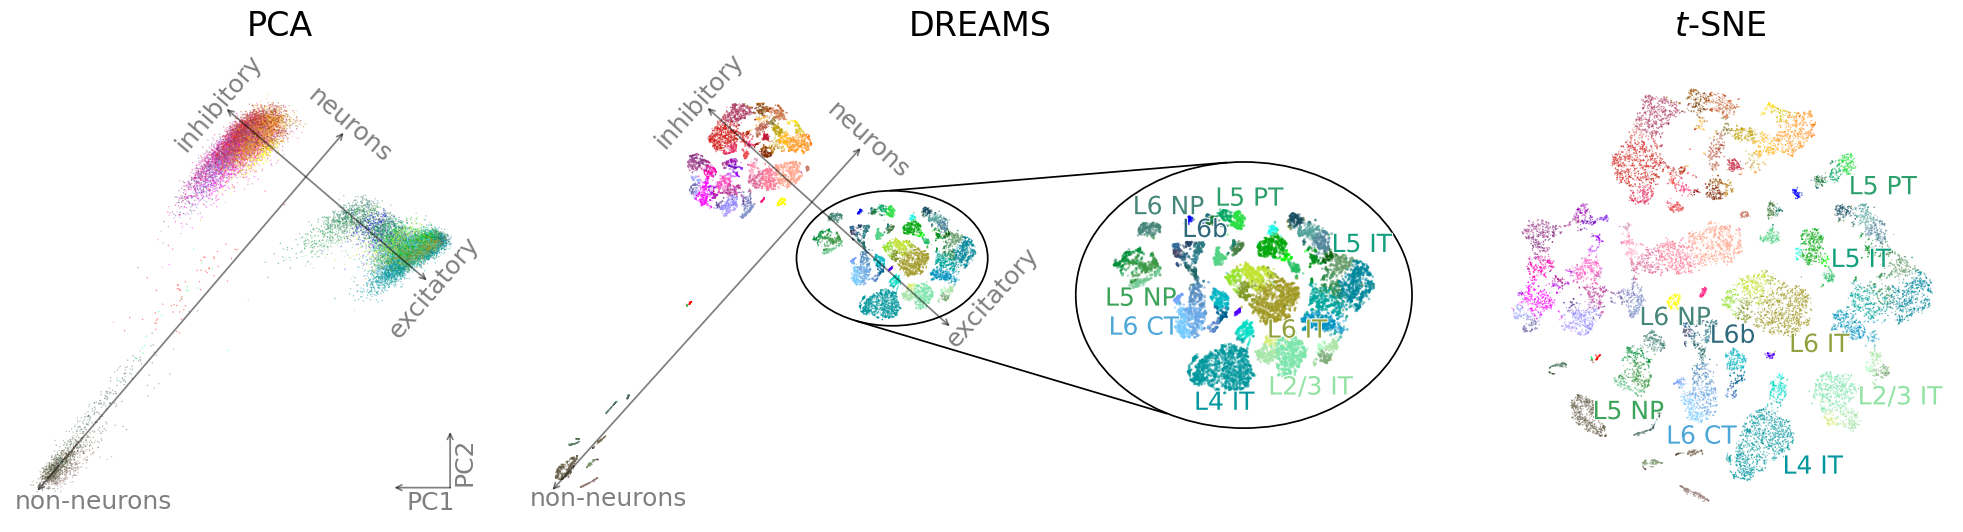

In [176]:
import math
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1, 0.8, 1]})

# axis
linewidth = 1.25
alpha = 0.5
textfont= 18

# PCA
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, show_eval=False, ax=ax[0], rasterized=True)

# PC1-PC2 axis
ax[0].annotate('', xy=(1.35, -2.15), xytext=(1.35, -2.7), 
               arrowprops=dict(arrowstyle='->', color='black', alpha=alpha, linewidth=linewidth, shrinkA=0, shrinkB=0,  # disables shortening at both ends
        connectionstyle="arc3,rad=0"))
ax[0].annotate('', xy=(0.8, -2.7), xytext=(1.35, -2.7), 
               arrowprops=dict(arrowstyle='->', color='black', alpha=alpha, linewidth=linewidth, shrinkA=0, shrinkB=0,  # disables shortening at both ends
        connectionstyle="arc3,rad=0"  # straight arrow
))
ax[0].text(1.16, -2.725, "PC1", va='top', ha='center', fontsize=textfont, alpha=alpha)
ax[0].text(1.49, -2.2, "PC2", va='top', ha='center', rotation=90, fontsize=textfont, alpha=alpha)

# exc.-inh. & neurons-non neurons axis
start = (0.3, 0.8)
end = (-2.72, -2.73)
ax[0].annotate('', xy=end, xytext=start, 
               arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth, 
               shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))
# Compute orthogonal vector
dx = end[0] - start[0]
dy = end[1] - start[1]
orth_dx, orth_dy = -dy, dx

length = 2.6
norm = np.sqrt(orth_dx**2 + orth_dy**2)
orth_dx *= length / norm
orth_dy *= length / norm

# Midpoint of original arrow
mid_x = (start[0] + end[0]) / 2
mid_y = (start[1] + end[1]) / 2

# --- Apply shifts ---
# 1. Vertical shift (up/down)
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
vertical_shift = -1.75
mid_x += vertical_shift * vec[0]
mid_y += vertical_shift * vec[1]

# 2. Horizontal shift (left/right)
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)
horizontal_shift = 0.27
mid_x += horizontal_shift * orth_vec[0]
mid_y += horizontal_shift * orth_vec[1]

# Compute new orthogonal arrow endpoints
new_start = (mid_x - orth_dx/2, mid_y - orth_dy/2)
new_end = (mid_x + orth_dx/2, mid_y + orth_dy/2)

# Draw orthogonal arrow
ax[0].annotate('', xy=new_end, xytext=new_start,
            arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth,
                            shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))

# add text
# inhibitory-excitatory axis
orth_dx = new_end[0] - new_start[0]
orth_dy = new_end[1] - new_start[1]
angle_ortho = math.degrees(math.atan2(orth_dy, orth_dx))

# Unit vector along orthogonal arrow
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)

offset = 0.1 

# Move label away from tail (start) backwards along orth_vec
inhib_x = new_start[0] - offset * orth_vec[0]
inhib_y = new_start[1] - offset * orth_vec[1]

# Move label away from tip (end) forward along orth_vec
excite_x = new_end[0] + offset * orth_vec[0]
excite_y = new_end[1] + offset * orth_vec[1]

ax[0].text(inhib_x, inhib_y, "inhibitory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

ax[0].text(excite_x, excite_y, "excitatory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

# neurons-non-neurons axis
dx = end[0] - start[0]
dy = end[1] - start[1]

angle = math.degrees(math.atan2(dy, dx))

# Unit vector along the original arrow
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
offset= 0.1

neurons_x = (start[0]) - offset * vec[0]
neurons_y = (start[1]) - offset * vec[1]

ax[0].text(neurons_x, neurons_y, "neurons", fontsize=textfont, alpha=alpha,
           rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

ax[0].text(end[0]+0.55, end[1]-0.1, "non-neurons", fontsize=textfont, alpha=alpha,
           # rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

# DREAMS
plot_embed(dreams_emb, dreams_eval, tasic_colors, show_eval=False, ax=ax[1], rasterized=True)

# axis
# arrows
start = (20, 35)
end = (-117, -117)
ax[1].annotate('', xy=end, xytext=start, 
               arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth, 
               shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))
# Compute orthogonal vector
dx = end[0] - start[0]
dy = end[1] - start[1]
orth_dx, orth_dy = -dy, dx

length = 145
norm = np.sqrt(orth_dx**2 + orth_dy**2)
orth_dx *= length / norm
orth_dy *= length / norm

# Midpoint of original arrow
mid_x = (start[0] + end[0]) / 2
mid_y = (start[1] + end[1]) / 2

# --- Apply shifts ---
# 1. Vertical shift (up/down)
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)
vertical_shift = -70
mid_x += vertical_shift * vec[0]
mid_y += vertical_shift * vec[1]

# 2. Horizontal shift (left/right)
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)
horizontal_shift = 10
mid_x += horizontal_shift * orth_vec[0]
mid_y += horizontal_shift * orth_vec[1]

# Compute new orthogonal arrow endpoints
new_start = (mid_x - orth_dx/2, mid_y - orth_dy/2)
new_end = (mid_x + orth_dx/2, mid_y + orth_dy/2)

# Draw orthogonal arrow
ax[1].annotate('', xy=new_end, xytext=new_start,
            arrowprops=dict(arrowstyle='<->', color='black', alpha=alpha, linewidth=linewidth,
                            shrinkA=0, shrinkB=0, connectionstyle="arc3,rad=0"))

# add text
# inhibitory-excitatory axis
orth_dx = new_end[0] - new_start[0]
orth_dy = new_end[1] - new_start[1]
angle_ortho = math.degrees(math.atan2(orth_dy, orth_dx))

# Unit vector along orthogonal arrow
orth_vec = np.array([orth_dx, orth_dy]) / np.sqrt(orth_dx**2 + orth_dy**2)

offset = 5

# Move label away from tail (start) backwards along orth_vec
inhib_x = new_start[0] - offset * orth_vec[0]
inhib_y = new_start[1] - offset * orth_vec[1]

# Move label away from tip (end) forward along orth_vec
excite_x = new_end[0] + offset * orth_vec[0]
excite_y = new_end[1] + offset * orth_vec[1]

ax[1].text(inhib_x, inhib_y, "inhibitory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')

# neurons-non-neurons axis
dx = end[0] - start[0]
dy = end[1] - start[1]

ax[1].text(excite_x - 0.11 * dx, excite_y - 0.11 * dy, "excitatory", fontsize=textfont, alpha=alpha,
           rotation=angle_ortho + 90, rotation_mode='anchor',
           ha='center', va='center')


angle = math.degrees(math.atan2(dy, dx))

# Unit vector along the original arrow
vec = np.array([dx, dy]) / np.sqrt(dx**2 + dy**2)

neurons_x = (start[0]) - offset * vec[0]
neurons_y = (start[1]) - offset * vec[1]

ax[1].text(neurons_x, neurons_y, "neurons", fontsize=textfont, alpha=alpha,
           rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

ax[1].text(end[0]+25, end[1]-3.5, "non-neurons", fontsize=textfont, alpha=alpha,
           # rotation=angle+90, rotation_mode='anchor',
           ha='center', va='center')

# ellipse excitatory
l_col = 'black'
l_width = 1.25
l_alpha = 1.0
center = (34, -14)

ellipse1 = Ellipse(center, 85, 60, angle=0,
                  edgecolor=l_col, facecolor='none', linewidth=l_width, alpha=l_alpha)

ax[1].add_patch(ellipse1)

# Dreams onyl excitatory
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

ax[2].scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none", rasterized=True)

center2 = (35, -14)
ellipse2 = Ellipse(center2, 93.5, 74, angle=0,
                  edgecolor=l_col, facecolor='none', linewidth=l_width, alpha=l_alpha)

ax[2].add_patch(ellipse2)

def data_to_fig_coords(ax, x, y):
    return fig.transFigure.inverted().transform(ax.transData.transform((x, y)))

# Convert both centers to figure coordinates
fig_xy1 = data_to_fig_coords(ax[1], *center)

# lower line
line = Line2D([fig_xy1[0]-0.035, fig_xy1[0]+0.12],
              [fig_xy1[1]-0.123, fig_xy1[1]-0.308],
              transform=fig.transFigure,
              color=l_col, linewidth=l_width, alpha=l_alpha)
fig.lines.append(line)

# upper line
line = Line2D([fig_xy1[0]-0.018, fig_xy1[0]+0.15],
              [fig_xy1[1]+0.138, fig_xy1[1]+0.1941],
              transform=fig.transFigure,
              color=l_col, linewidth=l_width, alpha=l_alpha)
fig.lines.append(line)

# Plot centroids for each keyword
font = 18
c1 = centroids_o_ex['L2/3 IT']
ax[2].text(c1[0]-7, c1[1]-13, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids_o_ex['L4 IT']
ax[2].text(c2[0]-8, c2[1]-13, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids_o_ex['L5 IT']
ax[2].text(c3[0]+4 , c3[1] +7, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids_o_ex['L5 NP']
ax[2].text(c4[0] -9.5, c4[1] - 12, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids_o_ex['L5 PT']
ax[2].text(c5[0]-2.2, c5[1]+6.2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids_o_ex['L6 IT']
ax[2].text(c6[0] -1, c6[1] - 17, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids_o_ex['L6 CT']
ax[2].text(c7[0] - 25.5, c7[1]-8, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids_o_ex['L6 NP']
ax[2].text(c8[0] - 4.5, c8[1] + 2.7, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids_o_ex['L6b']
ax[2].text(c9[0]-2, c9[1] + 3.7, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax[2].set_aspect("equal")
ax[2].axis("off")

# t-SNE
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

ax[3].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=tasic_colors, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none", rasterized=True)

font = 18
# Plot centroids for each keyword
c1 = centroids['L2/3 IT']
ax[3].text(c1[0] + 5, c1[1]-8, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids['L4 IT']
ax[3].text(c2[0] + 10, c2[1]-16, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids['L5 IT']
ax[3].text(c3[0]-14 , c3[1]+8, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids['L5 NP']
ax[3].text(c4[0] -19, c4[1] -23, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids['L5 PT']
ax[3].text(c5[0] + 19, c5[1]-2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids['L6 IT']
ax[3].text(c6[0] + 2, c6[1] - 30, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids['L6 CT']
ax[3].text(c7[0] - 20, c7[1] -28, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids['L6 NP']
ax[3].text(c8[0] - 7, c8[1] + 5, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids['L6b']
ax[3].text(c9[0]+4.5, c9[1]-6, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax[3].set_aspect("equal")
ax[3].axis("off")

title_font = 24
fig.text(0.15, 1.03, "PCA", fontsize=title_font, ha='center', va='center')
fig.text(0.5, 1.03, "DREAMS", fontsize=title_font, ha='center', va='center')
fig.text(0.87, 1.03, "$t$-SNE", fontsize=title_font, ha='center', va='center')

plt.tight_layout()

# save the figure
fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/figure_1_final4.pdf', bbox_inches='tight', dpi=500)

## figure 2

In [177]:
tasic_umap_results = tasic_om_results['umap']
tasic_umap_emb = tasic_umap_results['seed_0']['embedding']
tasic_umap_eval = tasic_umap_results['seed_0']['eval']

tasic_phate_results = tasic_om_results['phate']
tasic_phate_emb = tasic_phate_results['seed_2']['embedding']
tasic_phate_eval = tasic_phate_results['seed_2']['eval']

tasic_starmap_results = tasic_om_results['star_map']
tasic_starmap_emb = tasic_starmap_results['seed_0']['embedding']
tasic_starmap_eval = tasic_starmap_results['seed_0']['eval']

tasic_mds_hybrid_results = tasic_om_results['squad_mds_hybrid']
tasic_mds_hybrid_emb = tasic_mds_hybrid_results['seed_0']['embedding']
tasic_mds_hybrid_eval = tasic_mds_hybrid_results['seed_0']['eval']

In [178]:
tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

tasic_dreams_0025 = tasic_reg_results['seed_0']['lambda_0.025']['embedding']
tasic_dreams_0025_eval = tasic_reg_results['seed_0']['lambda_0.025']['eval']

tasic_dreams_005 = tasic_reg_results['seed_0']['lambda_0.05']['embedding']
tasic_dreams_005_eval = tasic_reg_results['seed_0']['lambda_0.05']['eval']

tasic_dreams_0075 = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['embedding']
tasic_dreams_0075_eval = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['eval']

tasic_dreams_01 = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
tasic_dreams_01_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tasic_dreams_02 = tasic_reg_results['seed_0']['lambda_0.2']['embedding']
tasic_dreams_02_eval = tasic_reg_results['seed_0']['lambda_0.2']['eval']

tasic_dreams_05 = tasic_reg_results['seed_0']['lambda_0.5']['embedding']
tasic_dreams_05_eval = tasic_reg_results['seed_0']['lambda_0.5']['eval']

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none", rasterized=rasterized)


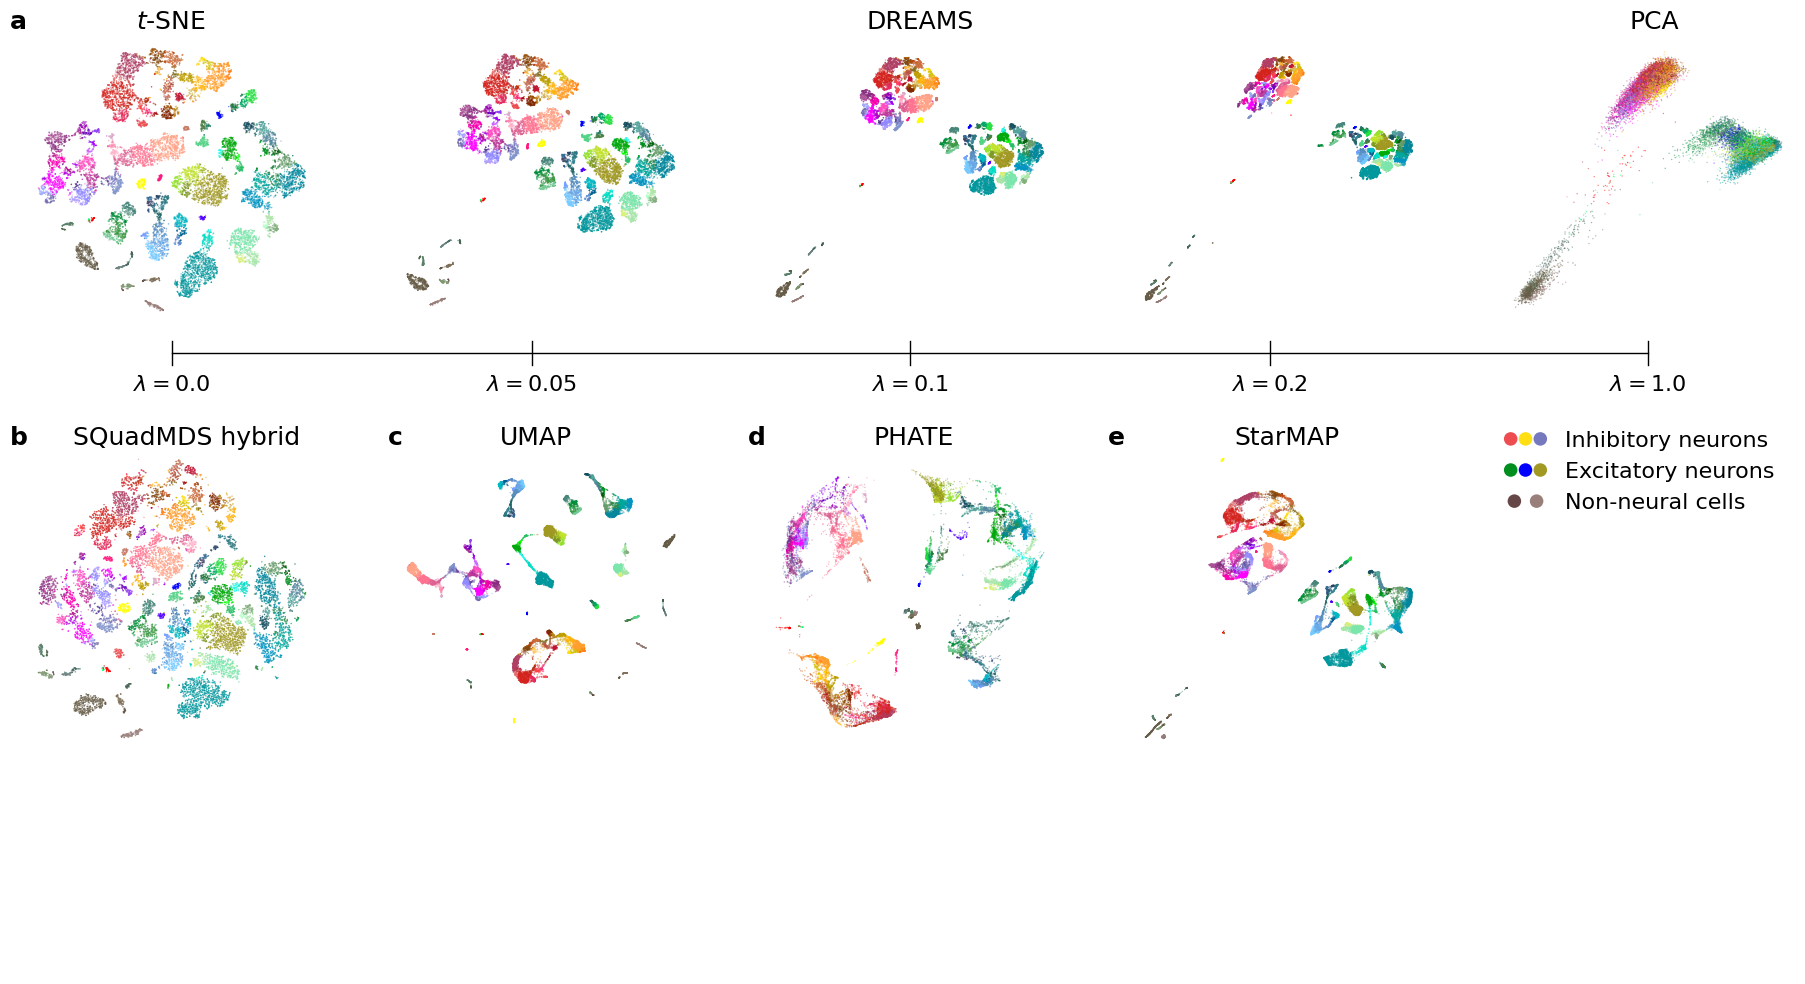

In [179]:
from matplotlib.lines import Line2D
from scipy.linalg import orthogonal_procrustes

Xc = tasic_pca2_scaled - tasic_pca2_scaled.mean(axis=0)

fig, ax = plt.subplots(2, 5, figsize=(18, 12))

fig.text(0.0, 0.8, "a", fontsize=18, fontweight='bold')
fig.text(0.07, 0.8, '$t$-SNE', fontsize=18)
fig.text(0.476, 0.8, 'DREAMS', fontsize=18)
fig.text(0.9, 0.8, 'PCA', fontsize=18)

eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0,0], eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False, rasterized=True)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[0,1], eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False, rasterized=True)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[0,2],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False, rasterized=True)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[0,3],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False, rasterized=True)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[0,4],  eval_size=eval_size, title_size=title_size, show_eval=False, show_KNC=False, rasterized=True)

# second row
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerBase

plot_embed(tasic_mds_hybrid_emb, tasic_mds_hybrid_eval, tasic_colors, ax=ax[1,0], show_eval=False, show_KNC=False, rasterized=True)
umap_c = tasic_umap_emb - tasic_umap_emb.mean(axis=0)
R,_ = orthogonal_procrustes(Xc, umap_c)
umap_alligned = tasic_umap_emb @ R
plot_embed(umap_alligned, tasic_umap_eval, tasic_colors, ax=ax[1,1], show_eval=False, show_KNC=False, rasterized=True)
phate_c = tasic_phate_emb - tasic_phate_emb.mean(axis=0)
R,_ = orthogonal_procrustes(Xc, phate_c)
phate_alligned = tasic_phate_emb @ R
plot_embed(phate_alligned, tasic_phate_eval, tasic_colors, ax=ax[1,2], show_eval=False, show_KNC=False, rasterized=True)
plot_embed(tasic_starmap_emb, tasic_starmap_eval, tasic_colors, ax=ax[1,3], show_eval=False, show_KNC=False, rasterized=True)

group_colors = [
    [col_inhib_0, col_inhib_1, col_inhib_2],
    [col_excit_0, col_excit_1, col_excit_2],
    [col_non_neural_0, col_non_neural_1]
]

ax[1,4].axis('off')


# Labels for each group
legend_labels = ['Inhibitory neurons', 'Excitatory neurons', 'Non-neural cells']

# Create dummy handles
dummy_handles = [plt.Line2D([], [], linestyle='None') for _ in group_colors]

# Custom handler that draws multiple colored circles in one legend entry
class MultiColorCircleHandler(HandlerBase):
    def __init__(self, colors, **kwargs):
        super().__init__(**kwargs)
        self.colors = colors

    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        n = len(self.colors)
        radius = height / 2.3
        spacing = width / max(n, 1)
        artists = []
        for i, c in enumerate(self.colors):
            center = (x0 + i * spacing + spacing/2, y0 + height / 2)
            circle = Circle(center, radius=radius, facecolor=c, edgecolor='none', transform=trans)
            artists.append(circle)
        return artists

# Build handler_map with actual color groups
handler_map = {
    dummy_handles[i]: MultiColorCircleHandler(group_colors[i])
    for i in range(len(group_colors))
}

# Add the custom legend
ax[1,4].legend(dummy_handles, legend_labels, handler_map=handler_map, loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1, 0.75))

descr = ["b", "c", "d", "e"]
positions = [
    (0., 0.453),  # ax[1, 0]
    (0.21, 0.453),  # ax[1, 1]
    (0.41, 0.453),  # ax[1, 2]
    (0.61, 0.453),  # ax[1, 3]
]

for label, (x, y) in zip(descr, positions):
    fig.text(x, y, label, fontsize=18, fontweight="bold")

meth = ["SQuadMDS hybrid", "UMAP", "PHATE", "StarMAP"]
positions = [
    (0.035, 0.453),  # ax[1, 0]
    (0.272, 0.453),  # ax[1, 1]
    (0.48, 0.453),  # ax[1, 2]
    (0.68, 0.453),  # ax[1, 3]
]

for label, (x, y) in zip(meth, positions):
    fig.text(x, y, label, fontsize=18)

fig.lines.append(plt.Line2D(
            [0.09, 0.91],
            [0.53, 0.53],
            transform=fig.transFigure,
            color="black",
            linewidth=1
        ))

x_ticks_pos = [0.09, 0.29, 0.5, 0.70, 0.91]
lam_vals = [0.0, 0.05, 0.1, 0.2, 1.0]

for i, pos in enumerate(x_ticks_pos):
    fig.lines.append(plt.Line2D(
            [pos, pos],
            [0.54, 0.52],
            transform=fig.transFigure,
            color="black",
            linewidth=1
        ))
    fig.text(pos, 0.495, f'$\lambda={lam_vals[i]}$', fontsize=16, ha='center', va='bottom')

plt.subplots_adjust(hspace=-1.0)
plt.tight_layout()

fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/figure_2_final.pdf', bbox_inches='tight', dpi=500)

## fig 3 & 4

In [69]:
idx_pacmap = tasic_methods_om.index('pacmap')
print(f"Index of 'pacmap': {idx_pacmap}")

Index of 'pacmap': 2


In [70]:
# exclude methods
idx_pacmap = tasic_methods_om.index('pacmap')
idx_trimap = tasic_methods_om.index('trimap')
exclude_methods = [idx_pacmap, idx_trimap]
mask = np.ones(len(tasic_methods_om), dtype=bool)
mask[exclude_methods] = False
methods_om = [m for i, m in enumerate(tasic_methods_om) if mask[i]]
print(methods_om)

tasic_om_knn_means = tasic_om_knn_means[mask]
tasic_om_knn_stds = tasic_om_knn_stds[mask]
tasic_om_cpd_means = tasic_om_cpd_means[mask]
tasic_om_cpd_stds = tasic_om_cpd_stds[mask]

kanton_om_knn_means = kanton_om_knn_means[mask]
kanton_om_knn_stds = kanton_om_knn_stds[mask]
kanton_om_cpd_means = kanton_om_cpd_means[mask]
kanton_om_cpd_stds = kanton_om_cpd_stds[mask]

genome_om_knn_means = genome_om_knn_means[mask]
genome_om_knn_stds = genome_om_knn_stds[mask]
genome_om_cpd_means = genome_om_cpd_means[mask]
genome_om_cpd_stds = genome_om_cpd_stds[mask]

mnist_om_knn_means = mnist_om_knn_means[mask]
mnist_om_knn_stds = mnist_om_knn_stds[mask]
mnist_om_cpd_means = mnist_om_cpd_means[mask]
mnist_om_cpd_stds = mnist_om_cpd_stds[mask]

retina_om_knn_means = retina_om_knn_means[mask]
retina_om_knn_stds = retina_om_knn_stds[mask]
retina_om_cpd_means = retina_om_cpd_means[mask]
retina_om_cpd_stds = retina_om_cpd_stds[mask]

zfish_om_knn_means = zfish_om_knn_means[mask]
zfish_om_knn_stds = zfish_om_knn_stds[mask]
zfish_om_cpd_means = zfish_om_cpd_means[mask]
zfish_om_cpd_stds = zfish_om_cpd_stds[mask]

c_el_om_knn_means = c_el_om_knn_means[mask]
c_el_om_knn_stds = c_el_om_knn_stds[mask]
c_el_om_cpd_means = c_el_om_cpd_means[mask]
c_el_om_cpd_stds = c_el_om_cpd_stds[mask]


['squad_mds', 'squad_mds_hybrid', 'phate', 'star_map', 'umap']


In [71]:
datasets_pca = {
    "Tasic et al.": dict(
        pca_emb=tasic_pca2_scaled,
        labels=tasic_ttypes,
        data=tasic_pca50,
    ),
    "Kanton et al.": dict(
        pca_emb=kanton_pca2_scaled,
        labels=kanton_labels,
        data=kanton_pca50,
    ),
    "1000 Genomes": dict(
        pca_emb=genome_pca2_scaled,
        labels=genome_colors,
        data=genome_pca50,
    ),
    "MNIST": dict(
        pca_emb=mnist_pca2_scaled,
        labels=mnist_labels,
        data=mnist_pca50,
    ),
    "Wagner et al.": dict(
        pca_emb=zfish_pca2_scaled,
        labels=zfish_colors,
        data=zfish_pca50,
    ),
    "Packer et al.": dict(
        pca_emb=c_el_pca2_scaled,
        labels=c_el_labels,
        data=c_el_pca50,
    ),
    "Macosko et al.": dict(
        pca_emb=retina_pca2_scaled,
        labels=retina_labels,
        data=retina_pca50,
    ),
}

for dataset in datasets_pca:
    pca_emb = datasets_pca[dataset]['pca_emb']
    labels = datasets_pca[dataset]['labels']
    data = datasets_pca[dataset]['data']
    knn = []
    cpd = []
    for i in range(4):
        eval = embedding_quality(pca_emb, data, labels, seed=i)
        knn.append(eval[0])
        cpd.append(eval[2])
    knn = np.array(knn)
    cpd = np.array(cpd)
    knn_mean = np.mean(knn)
    knn_std = np.std(knn)
    cpd_mean = np.mean(cpd)
    cpd_std = np.std(cpd)
    evals = {
        'knn_mean': knn_mean,
        'knn_std': knn_std,
        'cpd_mean': cpd_mean,
        'cpd_std': cpd_std,
    }
    datasets_pca[dataset]['eval'] = evals


/tmp/ipykernel_360909/1569251678.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['pca_reg_cpd'][0], d['pca_reg_knn'][0], xerr=d['pca_reg_cpd_std'][0], yerr=d['pca_reg_knn_std'][0], c=col_tsne, markersize=scatter_size, fmt='o', clip_on=False)
/tmp/ipykernel_360909/1569251678.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.errorbar(d['pca_reg_cpd'][idx_01], d['pca_reg_knn'][idx_01], xerr=d['pca_reg_cpd_std'][idx_01], yerr=d['pca_reg_knn_std'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)
/tmp/ipykernel_360909/1569251678.py:103: FutureWarning: Series.__geti

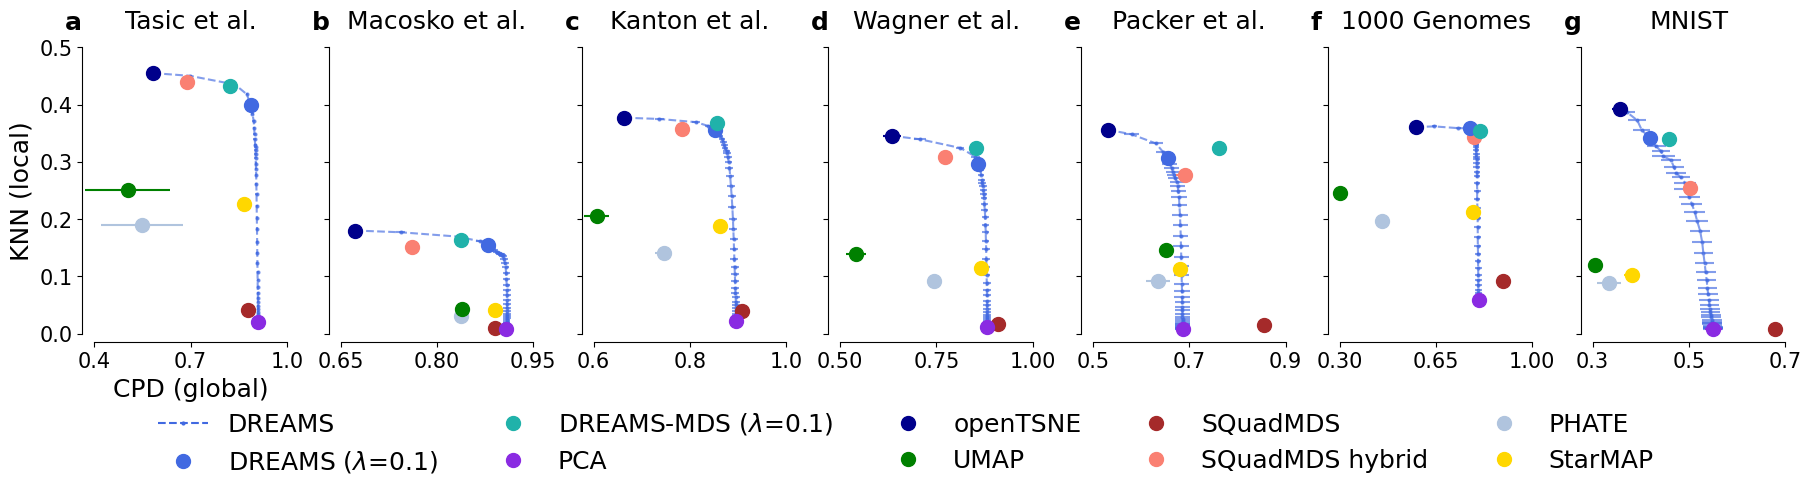

In [72]:
import string

# without 1000 Genomes
fig, ax = plt.subplots(1, 7, figsize=(18, 4), constrained_layout=True, gridspec_kw={'width_ratios': [1]*7}, sharey=True)
ax = ax.flatten()

# --- Configuration ---
marker_size = 2
scatter_size = 10
idx_01 = lambdas.index(0.1)

# Colors
col_errorbar = 'royalblue'
col_dreams = 'royalblue'
col_dreams_mds = 'lightseagreen'
col_pca = 'blueviolet'
col_tsne = 'darkblue'
# cols_om = ['lightsteelblue', 'salmon', 'brown', 'gold', 'green']
cols_om = ['brown', 'salmon', 'lightsteelblue', 'gold', 'green']
methods = ['SQuadMDS', 'SQuadMDS hybrid', 'PHATE', 'StarMAP', 'UMAP']

# --- Dataset-specific data ---
data_names = ["Tasic et al.", "Macosko et al.", "Kanton et al.", "Wagner et al.", "Packer et al.", "1000 Genomes" ,  "MNIST"]
datasets = {
    "Tasic et al.": dict(
        pca_emb=tasic_pca2_scaled,
        pca_reg_knn=tasic_reg_knn_means, pca_reg_cpd=tasic_reg_cpd_means,
        pca_reg_knn_std=tasic_reg_knn_stds, pca_reg_cpd_std=tasic_reg_cpd_stds,
        mds_reg_knn=tasic_mds_reg_knn_means, mds_reg_cpd=tasic_mds_reg_cpd_means,
        mds_reg_knn_std=tasic_mds_reg_knn_stds, mds_reg_cpd_std=tasic_mds_reg_cpd_stds,
        om_knn=tasic_om_knn_means, om_cpd=tasic_om_cpd_means,
        om_knn_std=tasic_om_knn_stds, om_cpd_std=tasic_om_cpd_stds
    ),
    "Macosko et al.": dict(
        pca_emb=retina_pca2_scaled,
        pca_reg_knn=retina_reg_knn_means, pca_reg_cpd=retina_reg_cpd_means,
        pca_reg_knn_std=retina_reg_knn_stds, pca_reg_cpd_std=retina_reg_cpd_stds,
        mds_reg_knn=retina_mds_reg_knn_means, mds_reg_cpd=retina_mds_reg_cpd_means,
        mds_reg_knn_std=retina_mds_reg_knn_stds, mds_reg_cpd_std=retina_mds_reg_cpd_stds,
        om_knn=retina_om_knn_means, om_cpd=retina_om_cpd_means,
        om_knn_std=retina_om_knn_stds, om_cpd_std=retina_om_cpd_stds
    ),
    "Kanton et al.": dict(
        pca_emb=kanton_pca2_scaled,
        pca_reg_knn=kanton_reg_knn_means, pca_reg_cpd=kanton_reg_cpd_means,
        pca_reg_knn_std=kanton_reg_knn_stds, pca_reg_cpd_std=kanton_reg_cpd_stds,
        mds_reg_knn=kanton_mds_reg_knn_means, mds_reg_cpd=kanton_mds_reg_cpd_means,
        mds_reg_knn_std=kanton_mds_reg_knn_stds, mds_reg_cpd_std=kanton_mds_reg_cpd_stds,
        om_knn=kanton_om_knn_means, om_cpd=kanton_om_cpd_means,
        om_knn_std=kanton_om_knn_stds, om_cpd_std=kanton_om_cpd_stds
    ),
    "Wagner et al.": dict(
        pca_emb=zfish_pca2_scaled,
        pca_reg_knn=zfish_reg_knn_means, pca_reg_cpd=zfish_reg_cpd_means,
        pca_reg_knn_std=zfish_reg_knn_stds, pca_reg_cpd_std=zfish_reg_cpd_stds,
        mds_reg_knn=zfish_mds_reg_knn_means, mds_reg_cpd=zfish_mds_reg_cpd_means,
        mds_reg_knn_std=zfish_mds_reg_knn_stds, mds_reg_cpd_std=zfish_mds_reg_cpd_stds,
        om_knn=zfish_om_knn_means, om_cpd=zfish_om_cpd_means,
        om_knn_std=zfish_om_knn_stds, om_cpd_std=zfish_om_cpd_stds
    ),
    "Packer et al.": dict(
        pca_emb=c_el_pca2_scaled,
        pca_reg_knn=c_el_reg_knn_means, pca_reg_cpd=c_el_reg_cpd_means,
        pca_reg_knn_std=c_el_reg_knn_stds, pca_reg_cpd_std=c_el_reg_cpd_stds,
        mds_reg_knn=c_el_mds_reg_knn_means, mds_reg_cpd=c_el_mds_reg_cpd_means,
        mds_reg_knn_std=c_el_mds_reg_knn_stds, mds_reg_cpd_std=c_el_mds_reg_cpd_stds,
        om_knn=c_el_om_knn_means, om_cpd=c_el_om_cpd_means,
        om_knn_std=c_el_om_knn_stds, om_cpd_std=c_el_om_cpd_stds
    ),
    "1000 Genomes": dict(
        pca_emb=genome_pca2_scaled,
        pca_reg_knn=genome_reg_knn_means, pca_reg_cpd=genome_reg_cpd_means,
        pca_reg_knn_std=genome_reg_knn_stds, pca_reg_cpd_std=genome_reg_cpd_stds,
        mds_reg_knn=genome_mds_reg_knn_means, mds_reg_cpd=genome_mds_reg_cpd_means,
        mds_reg_knn_std=genome_mds_reg_knn_stds, mds_reg_cpd_std=genome_mds_reg_cpd_stds,
        om_knn=genome_om_knn_means, om_cpd=genome_om_cpd_means,
        om_knn_std=genome_om_knn_stds, om_cpd_std=genome_om_cpd_stds
    ),
    "MNIST": dict(
        pca_emb=mnist_pca2_scaled,
        pca_reg_knn=mnist_reg_knn_means, pca_reg_cpd=mnist_reg_cpd_means,
        pca_reg_knn_std=mnist_reg_knn_stds, pca_reg_cpd_std=mnist_reg_cpd_stds,
        mds_reg_knn=mnist_mds_reg_knn_means, mds_reg_cpd=mnist_mds_reg_cpd_means,
        mds_reg_knn_std=mnist_mds_reg_knn_stds, mds_reg_cpd_std=mnist_mds_reg_cpd_stds,
        om_knn=mnist_om_knn_means, om_cpd=mnist_om_cpd_means,
        om_knn_std=mnist_om_knn_stds, om_cpd_std=mnist_om_cpd_stds
    ),
}

# --- Plot Loop ---
for i, name in enumerate(data_names):
    d = datasets[name]
    a = ax[i]
    a.set_title(name, fontsize=18, pad=13.5)

    # PCA point
    pca_eval = datasets_pca[name]['eval']
    a.errorbar(pca_eval['cpd_mean'], pca_eval['knn_mean'], yerr=pca_eval['knn_std'], xerr=pca_eval['cpd_std'], c=col_pca, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)

    # openTSNE, DREAMS, DREAMS-MDS
    a.errorbar(d['pca_reg_cpd'][0], d['pca_reg_knn'][0], xerr=d['pca_reg_cpd_std'][0], yerr=d['pca_reg_knn_std'][0], c=col_tsne, markersize=scatter_size, fmt='o', clip_on=False)
    a.errorbar(d['pca_reg_cpd'][idx_01], d['pca_reg_knn'][idx_01], xerr=d['pca_reg_cpd_std'][idx_01], yerr=d['pca_reg_knn_std'][idx_01], c=col_dreams, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)
    a.errorbar(d['mds_reg_cpd'][idx_01], d['mds_reg_knn'][idx_01], xerr=d['mds_reg_cpd_std'][idx_01], yerr=d['mds_reg_knn_std'][idx_01], c=col_dreams_mds, markersize=scatter_size, fmt='o', clip_on=False, zorder=10)

    # Regularizer (with std)
    a.errorbar(d['pca_reg_cpd'], d['pca_reg_knn'],
               xerr=d['pca_reg_cpd_std'], yerr=d['pca_reg_knn_std'],
               fmt='o--', c=col_errorbar, zorder=-1, markersize=marker_size, clip_on=False, alpha=0.65)

    # Other methods
    for j, method in enumerate(methods):
        a.errorbar(d['om_cpd'][j], d['om_knn'][j],
                   xerr=d['om_cpd_std'][j], yerr=d['om_knn_std'][j],
                   fmt='o', markersize=scatter_size, c=cols_om[j], clip_on=False)
        
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.set_ylim(0)  # Set y-limits for consistency
    # Move left spine a bit away from x=0
    a.spines['left'].set_position(('outward', 8.5))
    # Move bottom spine a bit upward from y=0
    a.spines['bottom'].set_position(('outward', 6))


    # Subplot label
    label = f"{string.ascii_lowercase[i]}"
    a.text(-0.15, 1.13, label, transform=a.transAxes,
           fontsize=18, va='top', ha='left', fontweight='bold')

    # x label ticks
    if name == 'Tasic et al.':
        a.set_xticks([0.4, 0.7, 1.0])
        a.set_xlim([0.4, 1.0])
    elif name == 'Kanton et al.':
        a.set_xticks([0.6, 0.8, 1.0])
        a.set_xlim([0.6, 1.0])
    elif name == '1000 Genomes':
        a.set_xticks([0.3, 0.65, 1.0])
        a.set_xlim([0.3, 1.0])
    elif name == 'Wagner et al.':
        a.set_xticks([0.5, 0.75, 1.0])
        a.set_xlim([0.5, 1.0])
    elif name == 'Packer et al.':
        a.set_xticks([0.5, 0.7, 0.9])
        a.set_xlim([0.5, 0.9])
    elif name == 'MNIST':
        a.set_xticks([0.3, 0.5, 0.7])
        a.set_xlim([0.3, 0.7])
    elif name == 'Macosko et al.':
        a.set_xticks([0.65, 0.8, 0.95])
        a.set_xlim([0.65, 0.95])

    a.tick_params(axis='both', labelsize=15)

ax[0].set_ylim(0.0, 0.5)
ax[0].set_yticks([0.0, 0.1, 0.2,0.3,0.4, 0.5])

ax[0].set_ylabel('KNN (local)', fontsize=18)
ax[0].set_xlabel('CPD (global)', fontsize=18)

# --- Legend ---
handles = [
    plt.Line2D([0], [0], color=col_errorbar, marker='o', linestyle='--', markersize=marker_size, label='DREAMS'),
    plt.Line2D([0], [0], color=col_dreams, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS ($\\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_dreams_mds, marker='o', linestyle='None', markersize=scatter_size, label='DREAMS-MDS ($\\lambda$=0.1)'),
    plt.Line2D([0], [0], color=col_pca, marker='o', linestyle='None', markersize=scatter_size, label='PCA'),
    plt.Line2D([0], [0], color=col_tsne, marker='o', linestyle='None', markersize=scatter_size, label='openTSNE'),
    plt.Line2D([0], [0], color=cols_om[-1], marker='o', linestyle='None', markersize=scatter_size, label=methods[-1]),
    *[plt.Line2D([0], [0], color=cols_om[i], marker='o', linestyle='None', markersize=scatter_size, label=methods[i]) for i in range(len(methods)-1)]
]

# Place the legend below the entire figure
fig.legend(
    handles=handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.23),  
    ncol=(len(handles)+1) // 2,
    fontsize=18,
    frameon=False
)

# --- Save the figure ---
#fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/figure_3_final2.pdf', bbox_inches='tight', dpi=500)

In [73]:
# PCA means
tasic_pca_knn_mean = datasets_pca['Tasic et al.']['eval']['knn_mean']
tasic_pca_cpd_mean = datasets_pca['Tasic et al.']['eval']['cpd_mean']
c_el_pca_knn_mean = datasets_pca['Packer et al.']['eval']['knn_mean']
c_el_pca_cpd_mean = datasets_pca['Packer et al.']['eval']['cpd_mean']

# MDS means
tasic_mds_knn = []
tasic_mds_cpd = []
c_el_mds_knn = []
c_el_mds_cpd = []

for i in range(4):
    eval = tasic_om_results['squad_mds'][f'seed_{i}']['eval']
    tasic_mds_knn.append(eval[0])
    tasic_mds_cpd.append(eval[2])

    eval_c = c_el_om_results['squad_mds'][f'seed_{i}']['eval']
    c_el_mds_knn.append(eval_c[0])
    c_el_mds_cpd.append(eval_c[2])

tasic_mds_knn = np.array(tasic_mds_knn)
tasic_mds_cpd = np.array(tasic_mds_cpd)
c_el_mds_knn = np.array(c_el_mds_knn)
c_el_mds_cpd = np.array(c_el_mds_cpd)

tasic_mds_knn_mean = np.mean(tasic_mds_knn)
tasic_mds_cpd_mean = np.mean(tasic_mds_cpd)
c_el_mds_knn_mean = np.mean(c_el_mds_knn)
c_el_mds_cpd_mean = np.mean(c_el_mds_cpd)




/tmp/ipykernel_360909/1893998662.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[2].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
/tmp/ipykernel_360909/1893998662.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[2].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.068, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
/tmp/ipykernel_360909/1893998662.py:27: FutureWarning: Seri

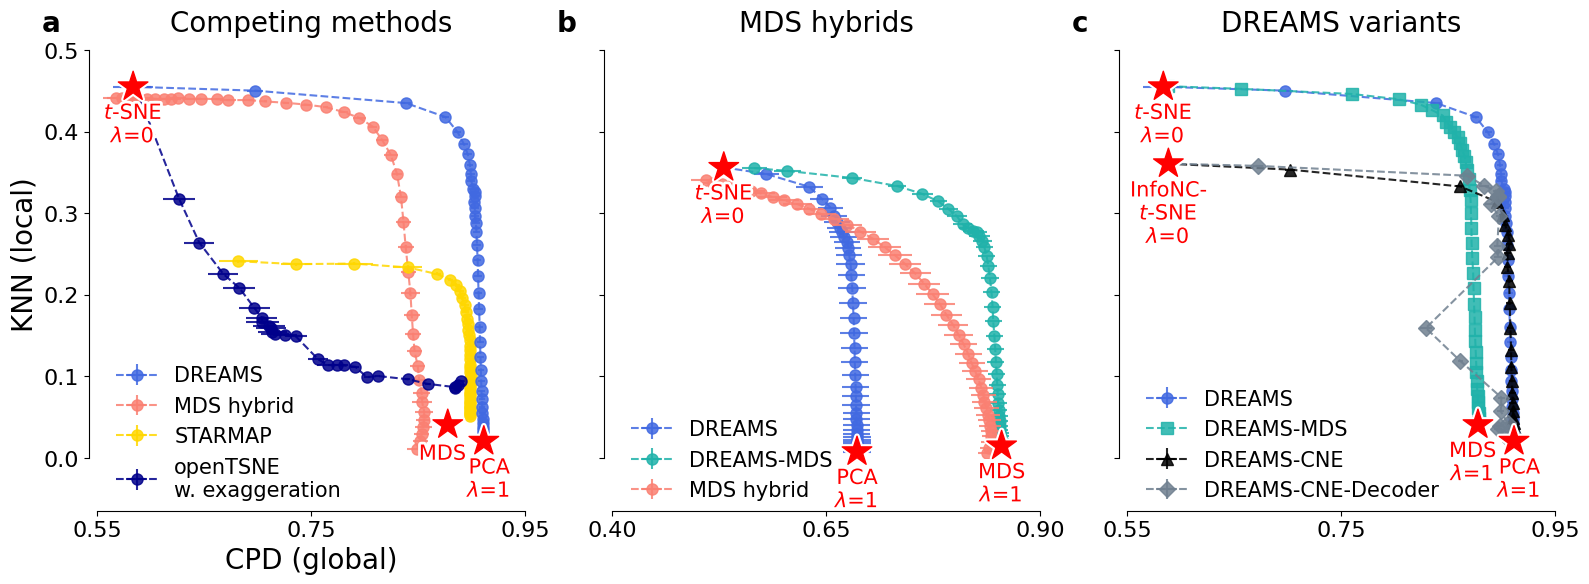

In [74]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

# own methods
col_pca = 'blueviolet'
col_tsne = 'darkblue'
col_dreams = 'royalblue'
col_dreams_mds = 'lightseagreen'

star_size = 500
text_size = 15
marker_size = 8
alpha = 0.85

# PCA
ax[2].scatter(tasic_pca_cpd_mean, tasic_pca_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[2].text(tasic_pca_cpd_mean + 0.005, tasic_pca_knn_mean - 0.068, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# MDS
ax[2].scatter(tasic_mds_cpd_mean, tasic_mds_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[2].text(tasic_mds_cpd_mean - 0.005, tasic_mds_knn_mean - 0.068, "MDS\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# openTSNE
ax[2].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
ax[2].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.068, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# InfoNC-t-SNE
ax[2].scatter(tasic_cne_reg_cpd_means[0], tasic_cne_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
ax[2].text(tasic_cne_reg_cpd_means[0], tasic_cne_reg_knn_means[0] - 0.097, "InfoNC-\n$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')]) 

# curves
ax[2].errorbar(tasic_reg_cpd_means, tasic_reg_knn_means, xerr=tasic_reg_cpd_stds, yerr=tasic_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS", zorder=-1, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[2].errorbar(tasic_mds_reg_cpd_means, tasic_mds_reg_knn_means, fmt='s--', c=col_dreams_mds, label="DREAMS-MDS", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[2].errorbar(tasic_cne_reg_cpd_means, tasic_cne_reg_knn_means, xerr=tasic_cne_reg_cpd_stds, yerr=tasic_cne_reg_knn_stds, fmt='^--', c='black', label="DREAMS-CNE", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[2].errorbar(tasic_cne_dec_cpd_means, tasic_cne_dec_knn_means, xerr=tasic_cne_dec_cpd_stds, yerr=tasic_cne_dec_knn_stds, fmt='D--', c='slategray', label="DREAMS-CNE-Decoder", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

# other methods
# PCA
ax[0].scatter(tasic_pca_cpd_mean, tasic_pca_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[0].text(tasic_pca_cpd_mean + 0.005, tasic_pca_knn_mean - 0.068, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# MDS
ax[0].scatter(tasic_mds_cpd_mean, tasic_mds_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[0].text(tasic_mds_cpd_mean - 0.005, tasic_mds_knn_mean - 0.043, "MDS", ha='center', fontsize=text_size, c='r', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# oenTSNE
ax[0].scatter(tasic_reg_cpd_means[0], tasic_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
ax[0].text(tasic_reg_cpd_means[0], tasic_reg_knn_means[0] - 0.068, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=11, path_effects=[pe.withStroke(linewidth=4, foreground='white')])

# curves
ax[0].errorbar(tasic_reg_cpd_means, tasic_reg_knn_means, xerr=tasic_reg_cpd_stds, yerr=tasic_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS", zorder=6, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[0].errorbar(tasic_mds_hy_cpd_means, tasic_mds_hy_knn_means, xerr=tasic_mds_hy_cpd_stds, yerr=tasic_mds_hy_knn_stds, fmt='o--', c='salmon', label="MDS hybrid", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[0].errorbar(tasic_starmap_cpd_means, tasic_starmap_knn_means, xerr=tasic_starmap_cpd_stds, yerr=tasic_starmap_knn_stds, fmt='o--', c='gold', label="STARMAP", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[0].errorbar(tasic_tsne_exag_cpd_means, tasic_tsne_exag_knn_means, xerr=tasic_tsne_exag_cpd_stds, yerr=tasic_tsne_exag_knn_stds, fmt='o--', c='darkblue', label="openTSNE\nw. exaggeration", zorder=5, markersize=marker_size, linewidth=1.5, alpha=alpha)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
#ax[1].set_xlabel('CPD (global)', fontsize=18)
#ax[1].set_ylabel('KNN (local)', fontsize=14)

# panel c
ax[1].errorbar(c_el_reg_cpd_means, c_el_reg_knn_means, xerr=c_el_reg_cpd_stds, yerr=c_el_reg_knn_stds, fmt='o--', c=col_dreams, label="DREAMS", zorder=6, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[1].errorbar(c_el_mds_reg_cpd_means, c_el_mds_reg_knn_means, xerr=c_el_mds_reg_cpd_stds, yerr=c_el_mds_reg_knn_stds, fmt='o--', c=col_dreams_mds, label="DREAMS-MDS", zorder=6, markersize=marker_size, linewidth=1.5, alpha=alpha)
ax[1].errorbar(c_el_mds_hy_cpd_means, c_el_mds_hy_knn_means, xerr=c_el_mds_hy_cpd_stds, yerr=c_el_mds_hy_knn_stds, fmt='o--', c='salmon', label="MDS hybrid", zorder=7, markersize=marker_size, linewidth=1.5, alpha=alpha)

# PCA
ax[1].scatter(c_el_pca_cpd_mean, c_el_pca_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[1].text(c_el_pca_cpd_mean, c_el_pca_knn_mean - 0.068, "PCA\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10,  path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# MDS
ax[1].scatter(c_el_mds_cpd_mean, c_el_mds_knn_mean, label="_nolegend_", c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')], clip_on=False)
ax[1].text(c_el_mds_cpd_mean, c_el_mds_knn_mean - 0.068, "MDS\n$\lambda$=1", ha='center', fontsize=text_size, c='r', zorder=10,  path_effects=[pe.withStroke(linewidth=4, foreground='white')])
# openTSNE
ax[1].scatter(c_el_reg_cpd_means[0], c_el_reg_knn_means[0], label='_nolegend_', c='r', s=star_size, marker='*', zorder=10, path_effects=[pe.withStroke(linewidth=4, foreground='white')])
ax[1].text(c_el_reg_cpd_means[0], c_el_reg_knn_means[0] - 0.068, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=text_size, c='r', zorder=10,  path_effects=[pe.withStroke(linewidth=4, foreground='white')])

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

titles = ['Competing methods', 'MDS hybrids', 'DREAMS variants']

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=16)
    ax[i].tick_params(axis='both', labelsize=16)

    ax[i].set_ylim(0.0, 0.5)
    ax[i].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

    ax[i].set_xlim(0.55, 0.95)
    ax[i].set_xticks([0.55, 0.75, 0.95])

    if i == 1:
        ax[i].set_xlim(0.4, 0.9)
        ax[i].set_xticks([0.4, 0.65, 0.9])

    ax[i].spines['left'].set_position(('outward', 6))
    ax[i].spines['bottom'].set_position(('outward', 38))

    # add bold letter labels
    label = f"{string.ascii_lowercase[i]}"
    ax[i].text(-0.13, 1.1, label, transform=ax[i].transAxes,
               fontsize=20, va='top', ha='left', fontweight='bold')
    
    ax[i].set_title(titles[i], fontsize=20, pad=13.5)

    ax[i].legend(fontsize=15, frameon=False, loc='lower left', bbox_to_anchor=(0.0, -0.15))


ax[0].set_xlabel('CPD (global)', fontsize=20)
ax[0].set_ylabel('KNN (local)', fontsize=20)

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/figure_4.pdf', bbox_inches='tight', dpi=500)

# Abstract

## figure all data

In [183]:
from scipy.linalg import orthogonal_procrustes

def procrustes(reference, emb):
    ref_centered = reference - reference.mean(axis=0)
    emb_centered = emb - emb.mean(axis=0)
    R, _ = orthogonal_procrustes(ref_centered, emb_centered)
    aligned_emb = emb @ R
    return aligned_emb

### Tasic

In [163]:
dict_all_data['Tasic et al.'].keys()

dict_keys(['DREAMS', 'DREAMS-MDS', 'DREAMS-CNE', 'DREAMS-CNE-Decoder', 'openTSNE', 'InfoNC-t-SNE', 'PCA', 'squad_mds', 'squad_mds_hybrid', 'pacmap', 'phate', 'trimap', 'star_map', 'umap'])

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:141: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


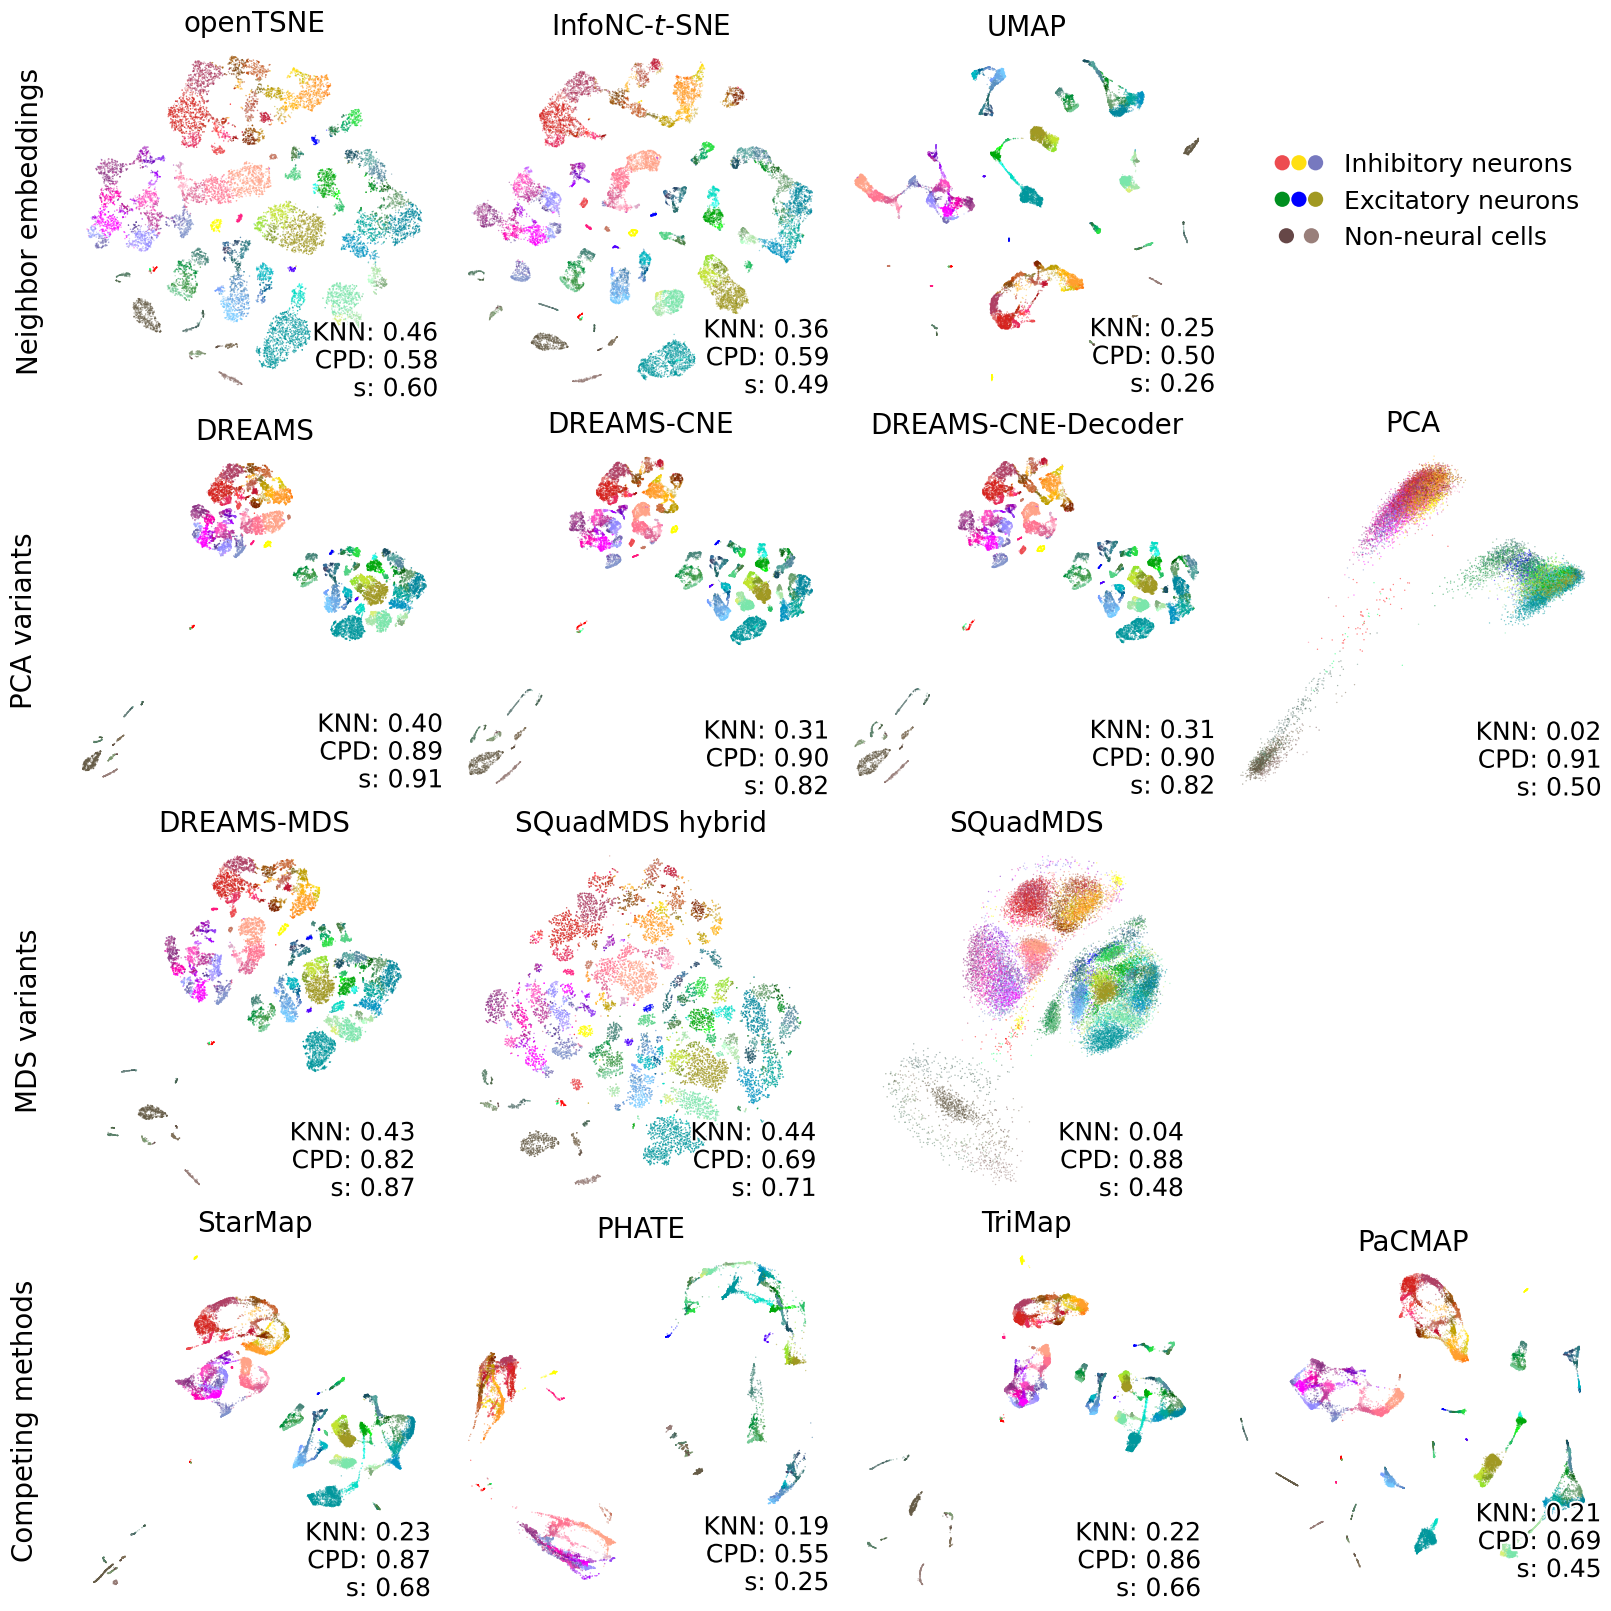

In [207]:
fig, ax = plt.subplots(4,4, figsize=(16, 16), constrained_layout=True)

dataset_name = 'Tasic et al.'
colors = tasic_colors.copy()
eval_size = 18
title_height = 1.0
title_font = 20

reference_emb = tasic_pca2_scaled.copy()

row_names = ['Neighbor embeddings', 'PCA variants', 'MDS variants', 'Competing methods']

for i, row_name in enumerate(row_names):
    if i == 2:
        ax[i, 0].text(-0.2, 0.5, row_name, fontsize=title_font, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)
    elif i == 3:
        ax[i, 0].text(-0.15, 0.5, row_name, fontsize=title_font, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)
    else:
        ax[i, 0].text(-0.11, 0.5, row_name, fontsize=title_font, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)

# neighbor embeddings
neighbor_emb = ['openTSNE', 'InfoNC-t-SNE', 'umap']
titles = ['openTSNE', 'InfoNC-$t$-SNE', 'UMAP']

for i, method in enumerate(neighbor_emb):
    knn = dict_all_data[dataset_name][method]['KNN']
    cpd = dict_all_data[dataset_name][method]['CPD']
    score = dict_all_data[dataset_name][method]['score']
    eval = (knn, cpd, score)
    embedding = dict_all_data[dataset_name][method]['embedding']
    emb_aligned = procrustes(reference_emb, embedding)

    plot_embed_score(emb_aligned, eval, colors, ax=ax[0, i], eval_size=eval_size, rasterized=True)
    ax[0, i].set_title(titles[i], fontsize=title_font, y=title_height)

    # bbox = ax[0, i].get_position()
    # x_center = bbox.x0 + (bbox.x1 - bbox.x0) / 2
    # fig.text(x_center, title_height, titles[i], fontsize=title_font, ha='center', va='bottom')
    
# legend
ax[0, 3].axis('off')
ax[0,3].legend(dummy_handles, legend_labels, handler_map=handler_map, loc='upper right', fontsize=eval_size, frameon=False, bbox_to_anchor=(1, 0.75))


# PCA variants
pca_variants = ['DREAMS', 'DREAMS-CNE', 'DREAMS-CNE-Decoder', 'PCA']

for i, method in enumerate(pca_variants):
    knn = dict_all_data[dataset_name][method]['KNN']
    cpd = dict_all_data[dataset_name][method]['CPD']
    score = dict_all_data[dataset_name][method]['score']
    eval = (knn, cpd, score)
    embedding = dict_all_data[dataset_name][method]['embedding']
    emb_aligned = procrustes(reference_emb, embedding)

    plot_embed_score(emb_aligned, eval, colors, ax=ax[1, i], eval_size=eval_size, rasterized=True)
    ax[1, i].set_title(method, fontsize=title_font, y=title_height)

# MDS variants
mds_variants = ['DREAMS-MDS', 'squad_mds_hybrid', 'squad_mds']
titles_mds = ['DREAMS-MDS', 'SQuadMDS hybrid', 'SQuadMDS']

for i, method in enumerate(mds_variants):
    knn = dict_all_data[dataset_name][method]['KNN']
    cpd = dict_all_data[dataset_name][method]['CPD']
    score = dict_all_data[dataset_name][method]['score']
    eval = (knn, cpd, score)
    embedding = dict_all_data[dataset_name][method]['embedding']
    emb_aligned = procrustes(reference_emb, embedding)

    plot_embed_score(emb_aligned, eval, colors, ax=ax[2, i], eval_size=eval_size, rasterized=True)
    ax[2, i].set_title(titles_mds[i], fontsize=title_font, y=title_height)
ax[2, 3].axis('off')  # Hide the empty subplot

# Competing methods
competing_methods = ['star_map', 'phate', 'trimap', 'pacmap']
titles_competing = ['StarMap', 'PHATE', 'TriMap', 'PaCMAP']

for i, method in enumerate(competing_methods):
    knn = dict_all_data[dataset_name][method]['KNN']
    cpd = dict_all_data[dataset_name][method]['CPD']
    score = dict_all_data[dataset_name][method]['score']
    eval = (knn, cpd, score)
    embedding = dict_all_data[dataset_name][method]['embedding']
    emb_aligned = procrustes(reference_emb, embedding)

    plot_embed_score(emb_aligned, eval, colors, ax=ax[3, i], eval_size=eval_size, rasterized=True)
    ax[3, i].set_title(titles_competing[i], fontsize=title_font, y=title_height)

# save
fig.savefig('/gpfs01/berens/user/nkury/tsne_pca/openTSNE/x.pdf', bbox_inches='tight', dpi=500)